<b><font color="SteelBlue" size="+3">Segmentez des clients d'un site e-commerce</font></b>

# Introduction

Ce notebook est la suite de l'EDA réalisé pour OLIST. Ici nous allons procéder aux tests pour choisir le meilleur modèle de clustering.

## Imports

In [1]:
# Chargement des librairies
# Builtin
import os

# Data
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer
from math import pi, ceil



# Clustering
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_samples, silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.manifold import TSNE
from sklearn.metrics import davies_bouldin_score

## Data

In [2]:
os.listdir()

['.ipynb_checkpoints',
 'Brazil_Regions.png',
 'carte-bresil.jpg',
 'Carte_bresil.png',
 'data',
 'Deveau_Estelle_1_script_032024.sql',
 'Deveau_Estelle_2_notebook_exploration_032024.ipynb',
 'Deveau_Estelle_3_notebook_essais_032024.ipynb',
 'Deveau_Estelle_4_notebook_simulation_032024.ipynb',
 'svg']

In [3]:
os.listdir("data/cleaned/")

['data.csv', 'data_ACP.csv', 'data_clean_non_normal.csv']

In [4]:
path     = "./data/cleaned/"
filename1 = "data.csv"


In [5]:
data = pd.read_csv(path + filename1)

In [6]:
filename2 = "data_clean_non_normal.csv"
data_clean_non_normal = pd.read_csv(path + filename2)

In [7]:
# Modification des affichages de colonnes, lignes et largeurs de colonnes pour avoir un maximum d'information
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Quick tour

In [8]:
data.head()

Recency  Frequency  AvgBasket   nb_item  AverageReviewScore  \
0 -0.823824  -0.166833  -0.083401 -0.291761            0.661413   
1 -0.804152  -0.166833  -0.609331 -0.291761           -0.120032   
2  1.963167  -0.166833  -0.338687 -0.291761           -0.901478   
3  0.546720  -0.166833  -0.534002 -0.291761           -0.120032   
4  0.330318  -0.166833   0.168721 -0.291761            0.661413   

   EngagementIndex  ActualDeliveryTime  DeliveryDelay  AvgWeight  \
0         2.095657           -0.646417       0.700191  -0.186601   
1        -0.504750           -0.976784       0.688748  -0.423669   
2        -0.504750            1.395680       0.972637  -0.186601   
3         0.795453            0.793777       0.007344  -0.471082   
4        -0.504750            0.064905       0.411915   0.772205   

   TotalInstallments  boleto_pct  voucher_pct  Region_CentreOuest  \
0           1.669969    -0.50049     -0.18714                 0.0   
1          -0.701200    -0.50049     -0.18714                 0.0   
2           1.669969    -0.50049     -0.18714                 0.0   
3           0.315015    -0.50049     -0.18714                 0.0   
4           0.992492    -0.50049     -0.18714                 0.0   

   Region_Nord  Region_NordEst  Region_Sud  Region_SudEst  
0          0.0             0.0         0.0            1.0  
1          0.0             0.0         0.0            1.0  
2          0.0             0.0         1.0            0.0  
3          1.0             0.0         0.0            0.0  
4          0.0             0.0         0.0            1.0

In [9]:
data.shape

(92411, 17)

In [10]:
data.dtypes.value_counts()

float64    17
Name: count, dtype: int64

In [11]:
data.describe()

Recency     Frequency     AvgBasket       nb_item  \
count  9.241100e+04  9.241100e+04  9.241100e+04  9.241100e+04   
mean   5.843595e-18 -2.792623e-16 -1.599300e-17  8.038788e-17   
std    1.000005e+00  1.000005e+00  1.000005e+00  1.000005e+00   
min   -1.551721e+00 -1.668332e-01 -6.900248e-01 -2.917611e-01   
25%   -8.107091e-01 -1.668332e-01 -4.480356e-01 -2.917611e-01   
50%   -1.221582e-01 -1.668332e-01 -2.495567e-01 -2.917611e-01   
75%    7.106604e-01 -1.668332e-01  7.465062e-02 -2.917611e-01   
max    2.999272e+00  3.848493e+01  6.191398e+01  3.713052e+01   

       AverageReviewScore  EngagementIndex  ActualDeliveryTime  DeliveryDelay  \
count        9.241100e+04     9.241100e+04        9.241100e+04   9.241100e+04   
mean        -2.245171e-17     9.145995e-17       -7.823498e-17  -1.276364e-17   
std          1.000005e+00     1.000005e+00        1.000005e+00   1.000005e+00   
min         -2.464370e+00    -2.975137e+00       -1.267677e+00  -1.339134e+01   
25%         -1.200325e-01    -5.047505e-01       -6.076500e-01  -5.012625e-01   
50%          6.614135e-01    -5.047505e-01       -2.437057e-01  -6.909324e-02   
75%          6.614135e-01     7.954532e-01        3.315297e-01   4.739649e-01   
max          6.614135e-01     1.249729e+01        2.069783e+01   1.987925e+01   

          AvgWeight  TotalInstallments    boleto_pct   voucher_pct  \
count  9.241100e+04       9.241100e+04  9.241100e+04  9.241100e+04   
mean   6.497155e-17       1.653122e-18 -2.629618e-17  3.690692e-17   
std    1.000005e+00       1.000005e+00  1.000005e+00  1.000005e+00   
min   -5.026911e-01      -1.039939e+00 -5.004897e-01 -1.871402e-01   
25%   -4.394731e-01      -7.012004e-01 -5.004897e-01 -1.871402e-01   
50%   -3.446461e-01      -3.624619e-01 -5.004897e-01 -1.871402e-01   
75%   -6.016502e-02       3.150149e-01 -5.004897e-01 -1.871402e-01   
max    3.835531e+01       2.063932e+01  2.005441e+00  6.125951e+00   

       Region_CentreOuest   Region_Nord  Region_NordEst    Region_Sud  \
count        92411.000000  92411.000000    92411.000000  92411.000000   
mean             0.058402      0.018634        0.094210      0.143446   
std              0.234504      0.135230        0.292122      0.350529   
min              0.000000      0.000000        0.000000      0.000000   
25%              0.000000      0.000000        0.000000      0.000000   
50%              0.000000      0.000000        0.000000      0.000000   
75%              0.000000      0.000000        0.000000      0.000000   
max              1.000000      1.000000        1.000000      1.000000   

       Region_SudEst  
count   92411.000000  
mean        0.685308  
std         0.464396  
min         0.000000  
25%         0.000000  
50%         1.000000  
75%         1.000000  
max         1.000000

In [12]:
data.nunique()

Recency                 610
Frequency                 8
AvgBasket             30063
nb_item                  19
AverageReviewScore       32
EngagementIndex          82
ActualDeliveryTime    90854
DeliveryDelay         88408
AvgWeight              3345
TotalInstallments        39
boleto_pct              242
voucher_pct            2157
Region_CentreOuest        2
Region_Nord               2
Region_NordEst            2
Region_Sud                2
Region_SudEst             2
dtype: int64

In [13]:
# Valeurs manquantes
missing_values_count = data.isnull().sum()
total_cells = np.product(data.shape)
total_missing = missing_values_count.sum()
percent_missing = (total_missing/total_cells) * 100
print('Le pourcentage de valeurs manquantes est de', round(percent_missing, 2),'%')

Le pourcentage de valeurs manquantes est de 0.0 %


In [14]:
percent_missing_values =  round((missing_values_count / len(data)) * 100, 2)
missing_data = pd.concat([missing_values_count, percent_missing_values], axis=1, keys=['Nombre de valeurs manquantes', 'Pourcentage de valeurs manquantes'])
display(missing_data)

Nombre de valeurs manquantes  \
Recency                                        0   
Frequency                                      0   
AvgBasket                                      0   
nb_item                                        0   
AverageReviewScore                             0   
EngagementIndex                                0   
ActualDeliveryTime                             0   
DeliveryDelay                                  0   
AvgWeight                                      0   
TotalInstallments                              0   
boleto_pct                                     0   
voucher_pct                                    0   
Region_CentreOuest                             0   
Region_Nord                                    0   
Region_NordEst                                 0   
Region_Sud                                     0   
Region_SudEst                                  0   

                    Pourcentage de valeurs manquantes  
Recency                                           0.0  
Frequency                                         0.0  
AvgBasket                                         0.0  
nb_item                                           0.0  
AverageReviewScore                                0.0  
EngagementIndex                                   0.0  
ActualDeliveryTime                                0.0  
DeliveryDelay                                     0.0  
AvgWeight                                         0.0  
TotalInstallments                                 0.0  
boleto_pct                                        0.0  
voucher_pct                                       0.0  
Region_CentreOuest                                0.0  
Region_Nord                                       0.0  
Region_NordEst                                    0.0  
Region_Sud                                        0.0  
Region_SudEst                                     0.0

# 12 indicateurs

In [15]:
# features à supprimer
data = data.drop(columns=[
 'Region_CentreOuest',
 'Region_Nord',
 'Region_NordEst',
 'Region_Sud',
 'Region_SudEst'   
])


In [16]:
data.columns.tolist()

['Recency',
 'Frequency',
 'AvgBasket',
 'nb_item',
 'AverageReviewScore',
 'EngagementIndex',
 'ActualDeliveryTime',
 'DeliveryDelay',
 'AvgWeight',
 'TotalInstallments',
 'boleto_pct',
 'voucher_pct']

In [17]:
features = data.columns

## Test de différentes méthodes

### K-means

In [18]:
# Initialisation du modèle KMeans
kmeans = KMeans(n_clusters=5, random_state=42,n_init=10)
kmeans.fit(data[features])

# Récupération des étiquettes de cluster pour chaque point de données
data['Cluster_kmeans'] = kmeans.labels_

data.head()


Recency  Frequency  AvgBasket   nb_item  AverageReviewScore  \
0 -0.823824  -0.166833  -0.083401 -0.291761            0.661413   
1 -0.804152  -0.166833  -0.609331 -0.291761           -0.120032   
2  1.963167  -0.166833  -0.338687 -0.291761           -0.901478   
3  0.546720  -0.166833  -0.534002 -0.291761           -0.120032   
4  0.330318  -0.166833   0.168721 -0.291761            0.661413   

   EngagementIndex  ActualDeliveryTime  DeliveryDelay  AvgWeight  \
0         2.095657           -0.646417       0.700191  -0.186601   
1        -0.504750           -0.976784       0.688748  -0.423669   
2        -0.504750            1.395680       0.972637  -0.186601   
3         0.795453            0.793777       0.007344  -0.471082   
4        -0.504750            0.064905       0.411915   0.772205   

   TotalInstallments  boleto_pct  voucher_pct  Cluster_kmeans  
0           1.669969    -0.50049     -0.18714               2  
1          -0.701200    -0.50049     -0.18714               2  
2           1.669969    -0.50049     -0.18714               4  
3           0.315015    -0.50049     -0.18714               2  
4           0.992492    -0.50049     -0.18714               2

In [19]:
score = silhouette_score(data[features], data['Cluster_kmeans'], n_jobs=-1)
print('Silhouette Score:', score)


Silhouette Score: 0.22799279039768913


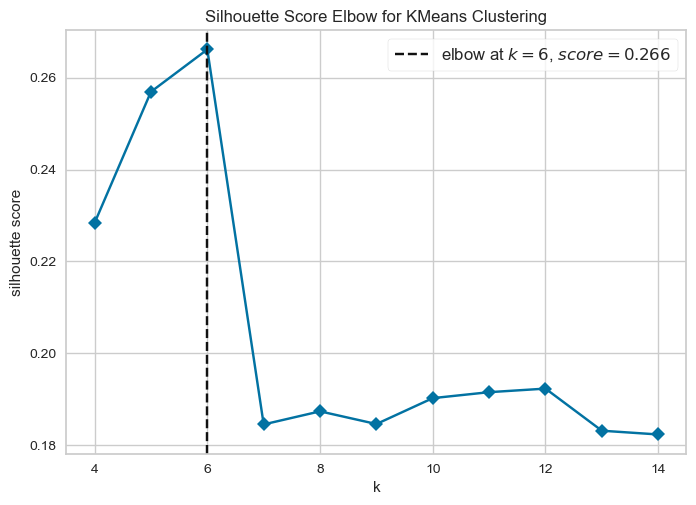

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [20]:
visualizer = KElbowVisualizer(KMeans(random_state=42, n_init=10), k=(4,15), metric='silhouette', timings=False, n_jobs=-1)
visualizer.fit(data)    
visualizer.show()

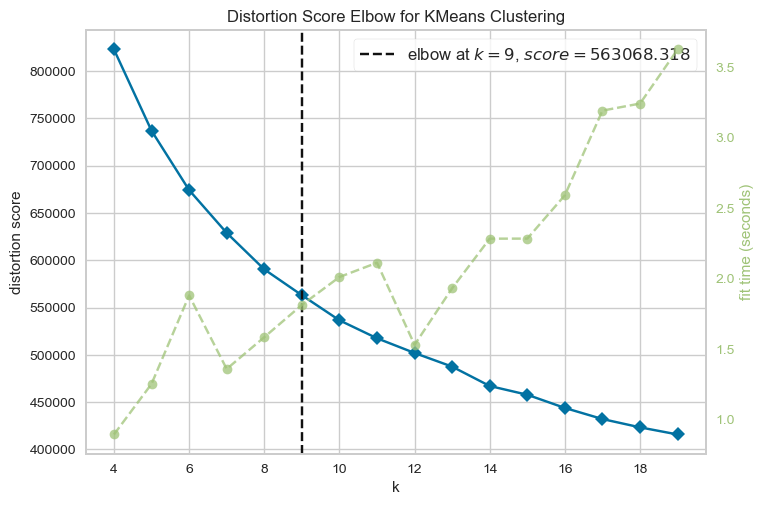

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [21]:
# distortion 
visualizer = KElbowVisualizer(KMeans(random_state=42, n_init=10), k=(4,20))
visualizer.fit(data)   
visualizer.poof()   

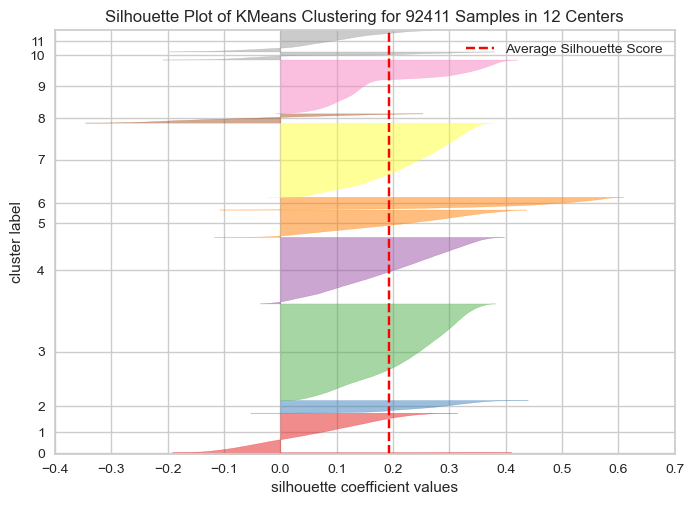

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 92411 Samples in 12 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [22]:
visualizer = SilhouetteVisualizer(KMeans(n_clusters=12, random_state=42, n_init=10))
visualizer.fit(data)
visualizer.show()

In [23]:
# Initialisation du modèle KMeans
kmeans = KMeans(n_clusters=12, random_state=42,n_init=10)
kmeans.fit(data[features])

# Récupération des étiquettes de cluster pour chaque point de données
data['Cluster_kmeans'] = kmeans.labels_

In [24]:
# Calculer le score de Davies-Bouldin
X = data[features] 
labels = data['Cluster_kmeans'] 
davies_bouldin = davies_bouldin_score(X, labels)

print(f"Le score de Davies-Bouldin pour le clustering KMeans est : {davies_bouldin}")

Le score de Davies-Bouldin pour le clustering KMeans est : 1.3256771276056076


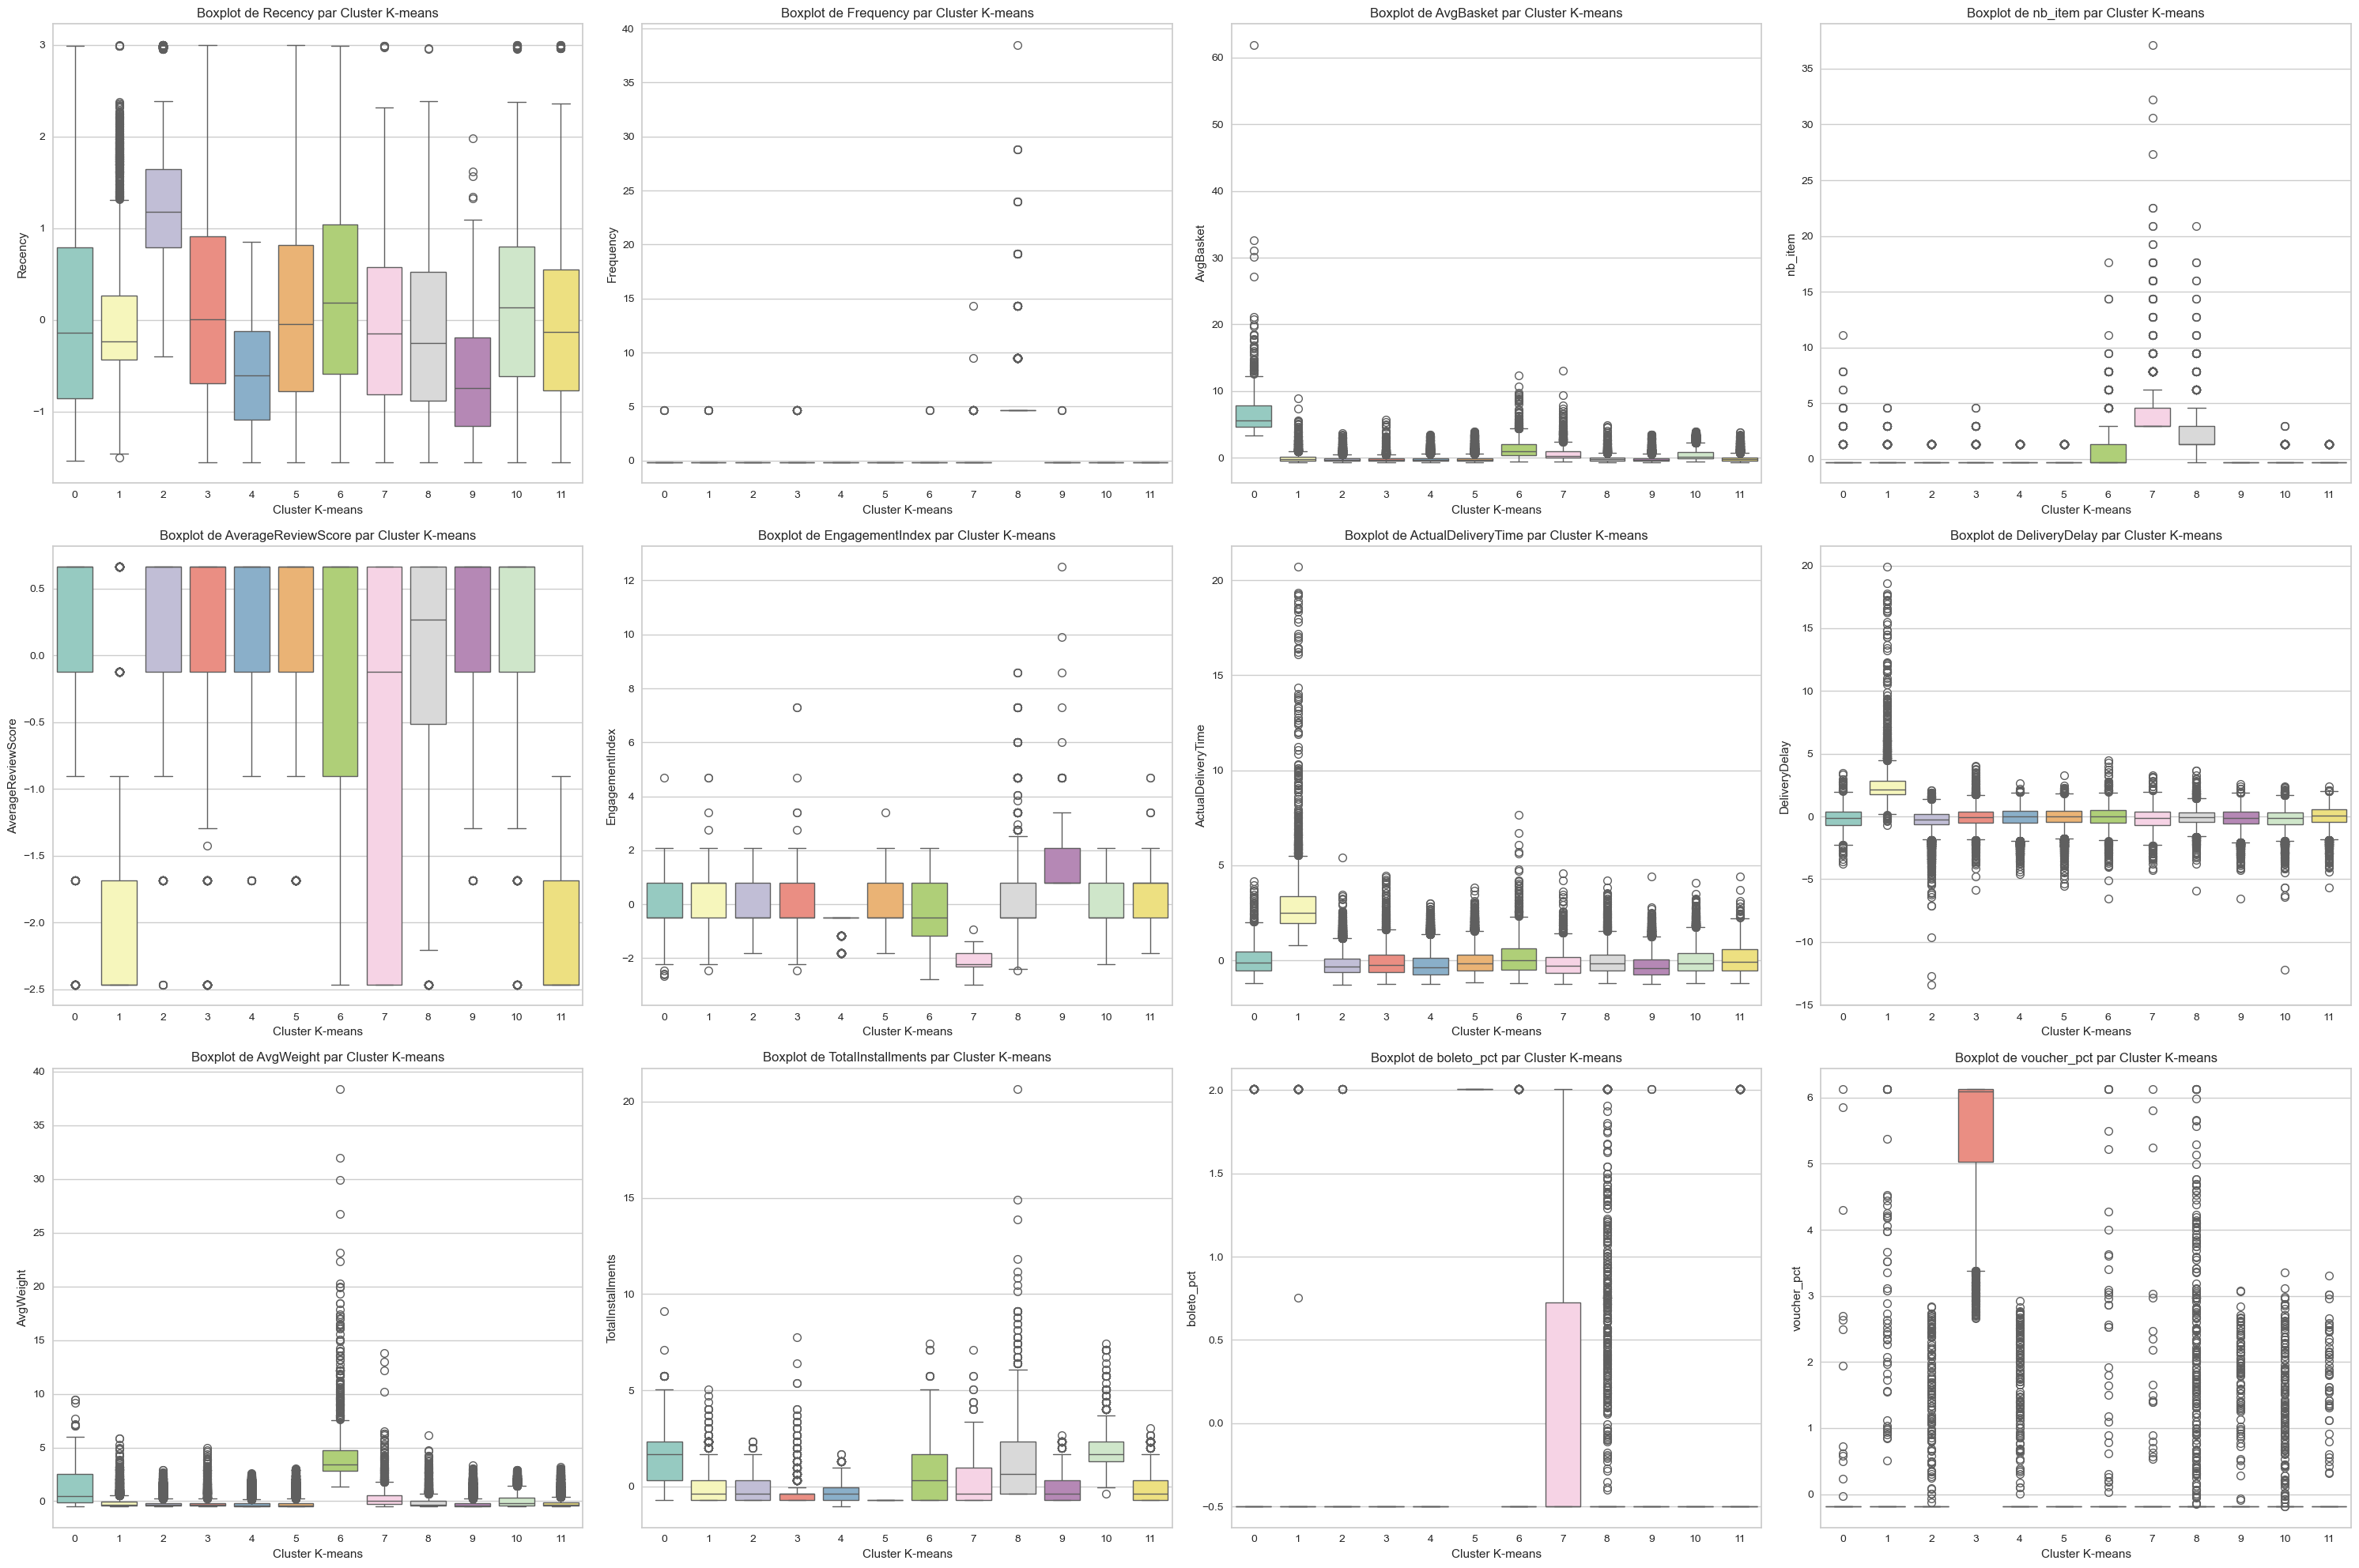

In [25]:
# Créer un boxplot pour chaque variable du dataframe en fonction des clusters
fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(30,20))
axs = axs.flatten()

for ax, column in zip(axs, features):
    sns.boxplot(x='Cluster_kmeans', y=column, data=data, ax=ax, palette='Set3', hue='Cluster_kmeans', legend=False)
    ax.set_xlabel('Cluster K-means')
    ax.set_ylabel(column)
    ax.set_title(f"Boxplot de {column} par Cluster K-means")

# Affichez les graphiques
plt.tight_layout()
plt.show()


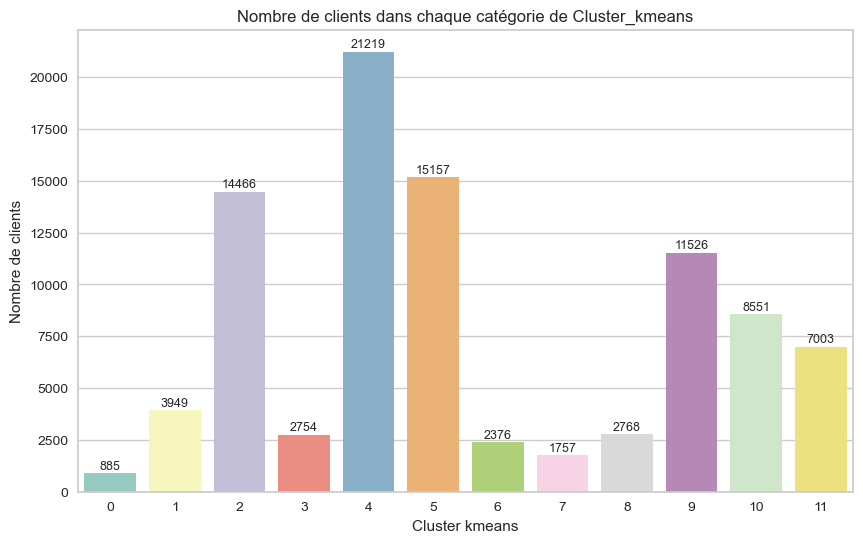

In [26]:
# Calculer le nombre de clients dans chaque catégorie de cluster
cluster_counts = data['Cluster_kmeans'].value_counts()

# Créer un graphique à barres pour afficher le nombre de clients par catégorie de cluster
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='Set3', hue=cluster_counts.index,legend=False)

for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.0f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     size=9, xytext = (0, 5), 
                     textcoords = 'offset points')

plt.xlabel('Cluster kmeans')
plt.ylabel('Nombre de clients')
plt.title('Nombre de clients dans chaque catégorie de Cluster_kmeans')
plt.show()

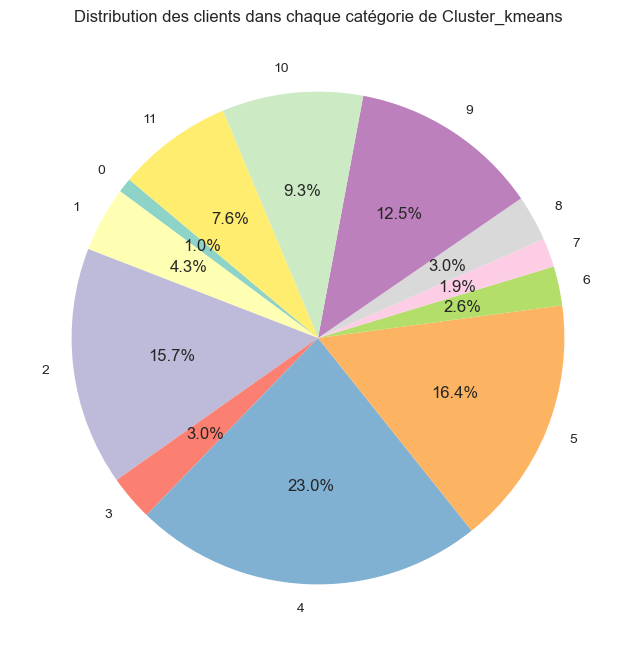

In [27]:
cluster_counts = data['Cluster_kmeans'].value_counts().sort_index()

# Créer un graphique en camembert pour afficher le pourcentage de clients par catégorie de cluster
plt.figure(figsize=(8, 8))
plt.pie(cluster_counts, labels=cluster_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set3', len(cluster_counts)))
plt.title('Distribution des clients dans chaque catégorie de Cluster_kmeans')
plt.show()

### DBSCAN

In [28]:
# Initialisation du modèle DBSCAN
dbscan = DBSCAN(eps=1.6, min_samples=200, n_jobs=-1)  
dbscan.fit(data[features])

# Récupération des étiquettes de cluster pour chaque point de données
data['Cluster_DB'] = dbscan.labels_  # -1 = bruit


In [29]:
score = silhouette_score(data[features], data['Cluster_DB'], n_jobs=-1)
print('Silhouette Score:', score)

Silhouette Score: 0.12863067336775477


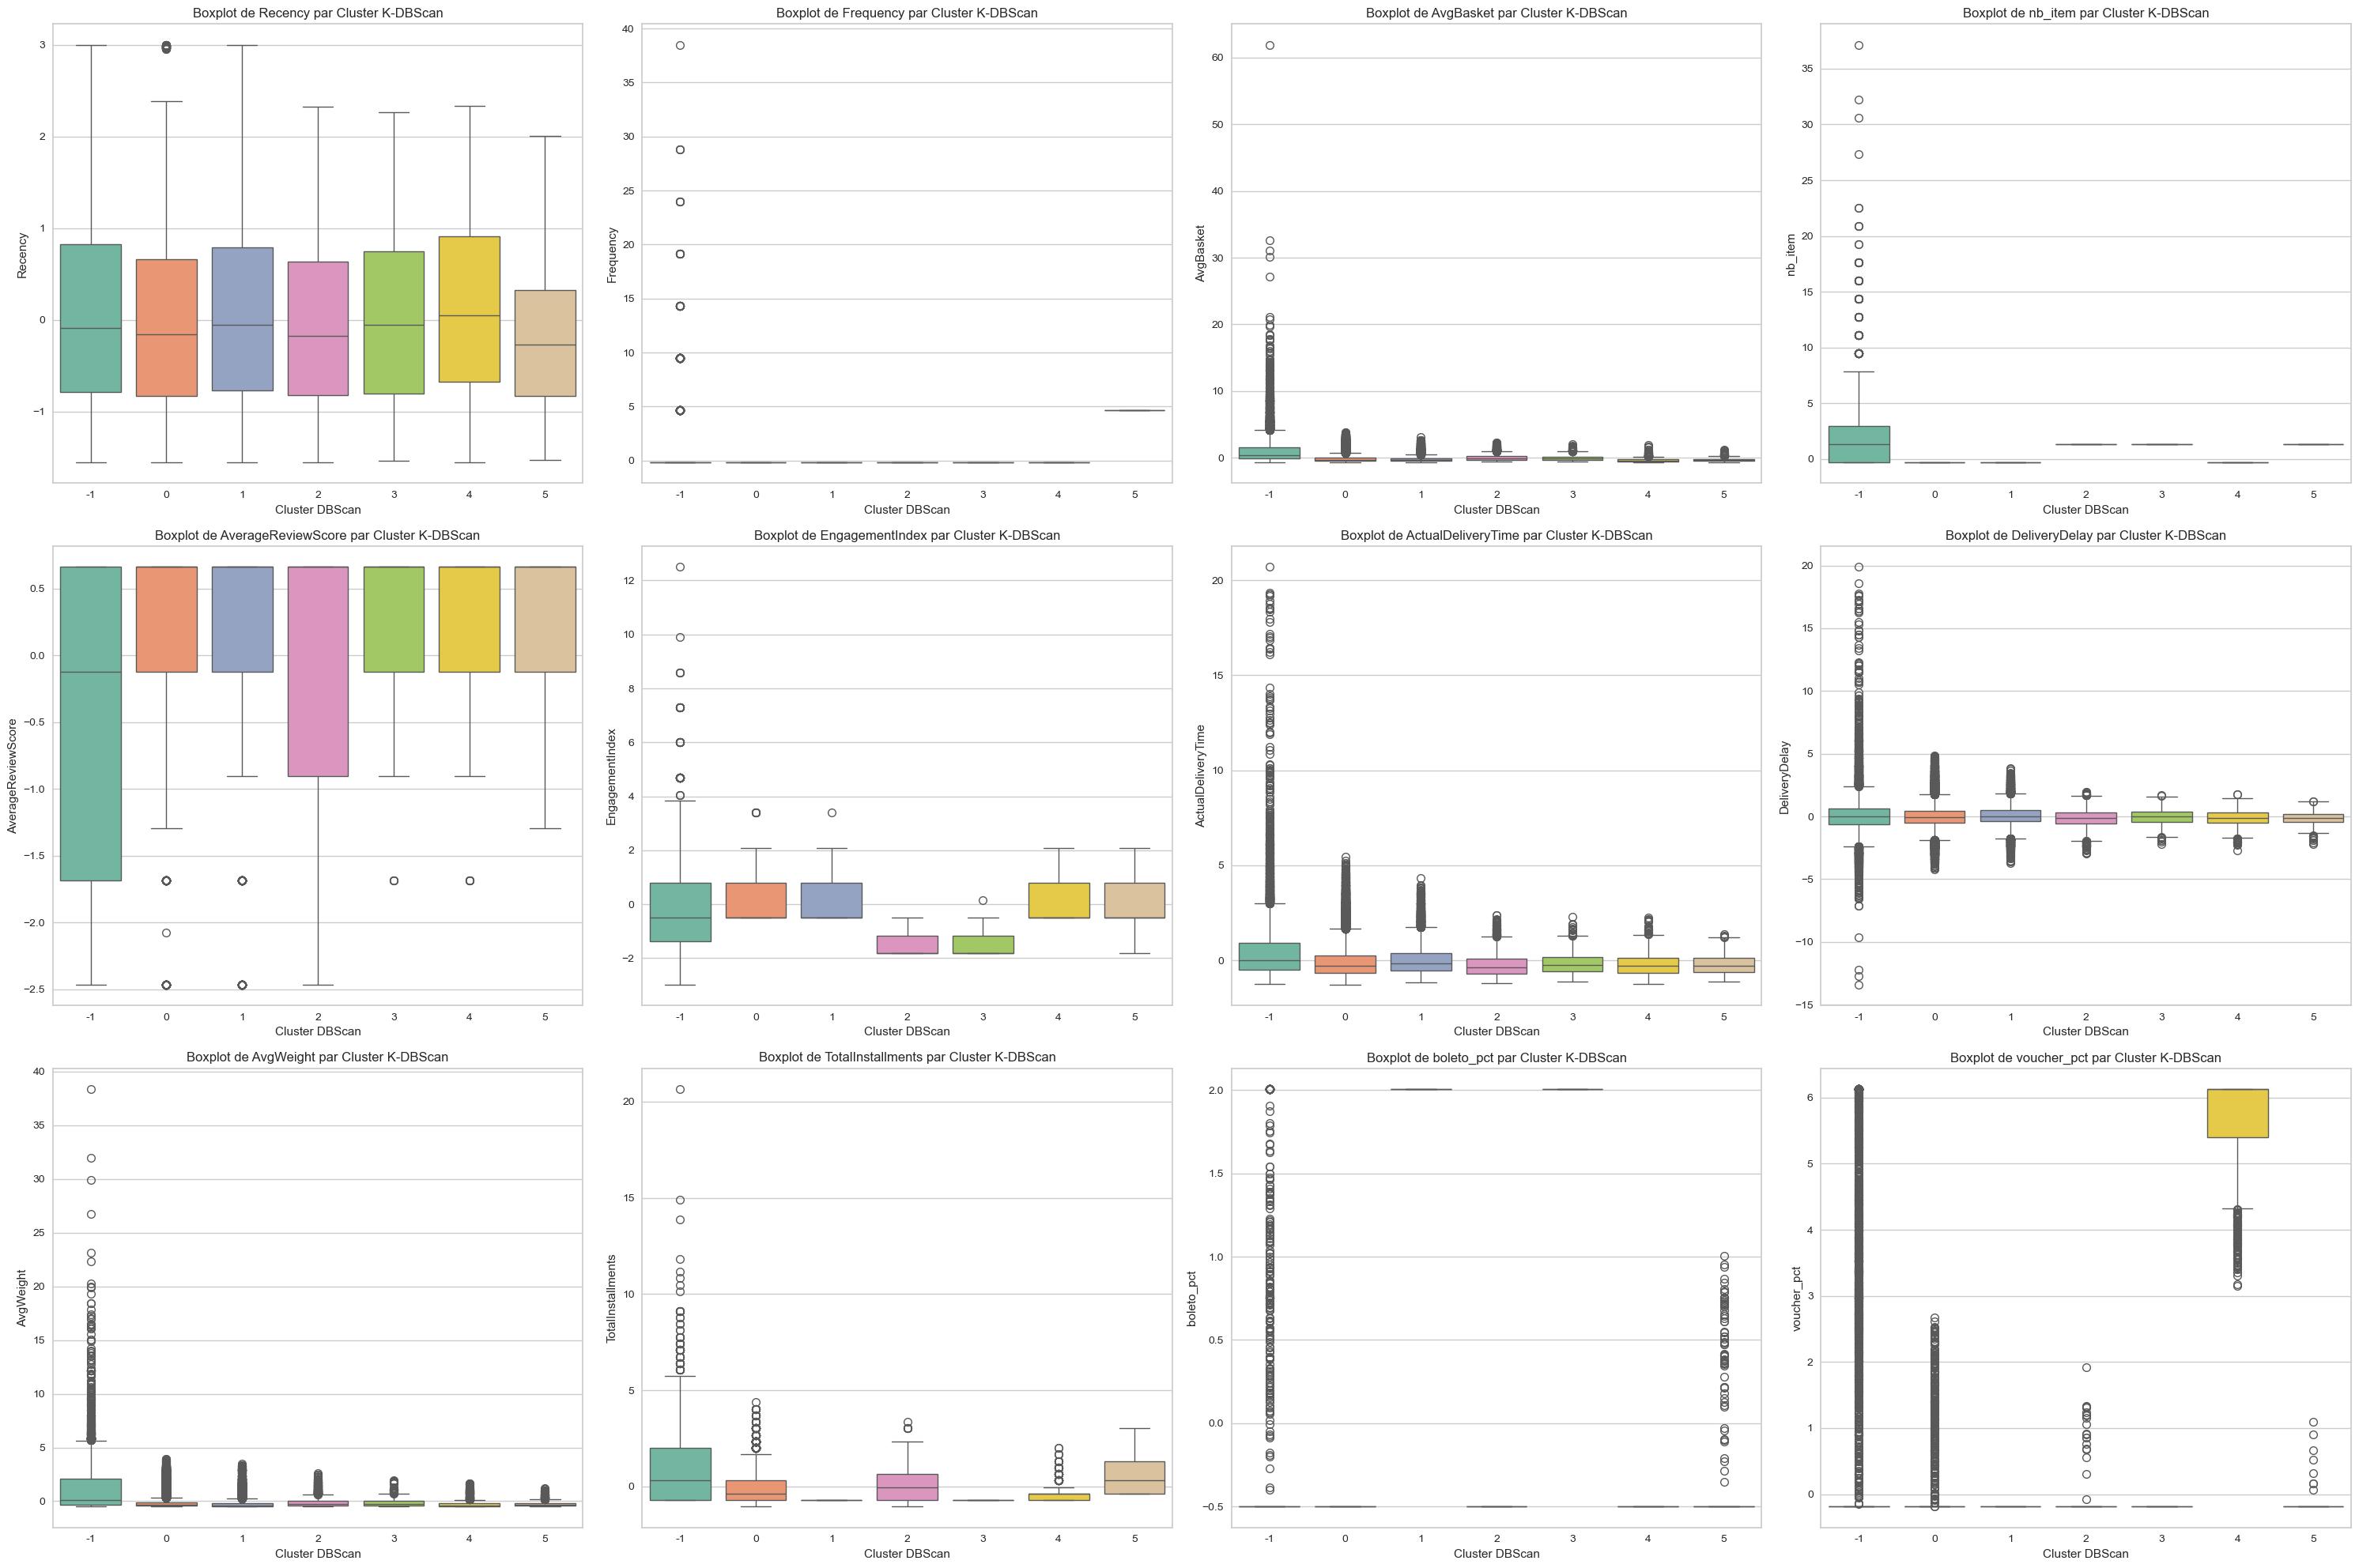

In [30]:
# Créer un boxplot pour chaque variable du dataframe en fonction des clusters
fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(30,20))
axs = axs.flatten()

for ax, column in zip(axs, features):
    sns.boxplot(x='Cluster_DB', y=column, data=data, ax=ax, palette='Set2', hue='Cluster_DB', legend=False)
    ax.set_xlabel('Cluster DBScan')
    ax.set_ylabel(column)
    ax.set_title(f"Boxplot de {column} par Cluster K-DBScan")

# Affichez les graphiques
plt.tight_layout()
plt.show()

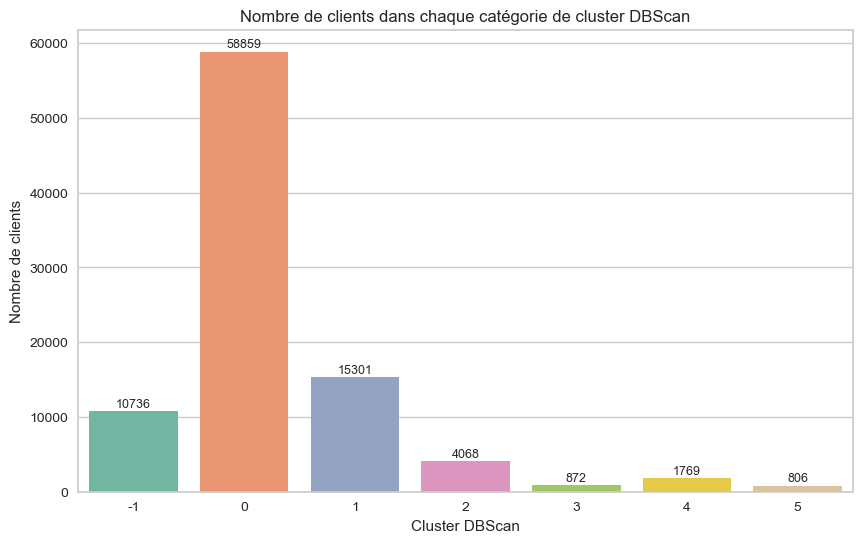

In [31]:
# Calculer le nombre de clients dans chaque catégorie de cluster
cluster_counts = data['Cluster_DB'].value_counts()

# Créer un graphique à barres pour afficher le nombre de clients par catégorie de cluster
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='Set2', hue=cluster_counts.index,legend=False)

for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.0f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     size=9, xytext = (0, 5), 
                     textcoords = 'offset points')

plt.xlabel('Cluster DBScan')
plt.ylabel('Nombre de clients')
plt.title('Nombre de clients dans chaque catégorie de cluster DBScan')

plt.show()

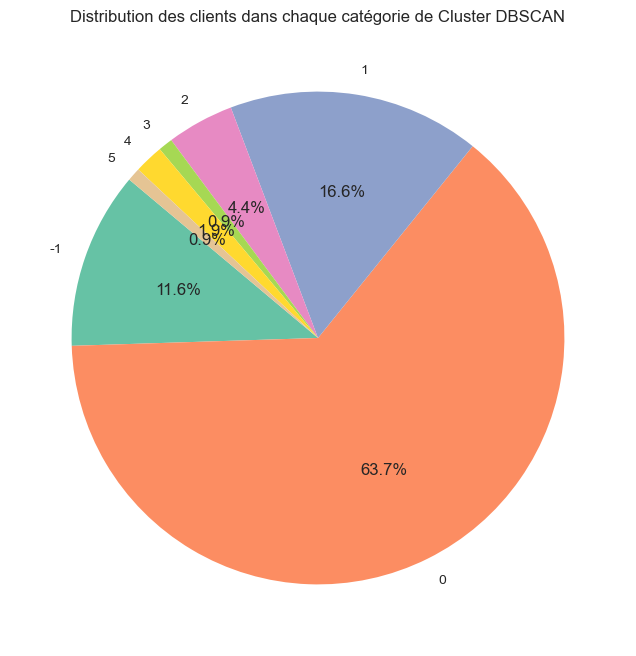

In [32]:
cluster_counts = data['Cluster_DB'].value_counts().sort_index()

# Créer un graphique en camembert pour afficher le pourcentage de clients par catégorie de cluster
plt.figure(figsize=(8, 8))
plt.pie(cluster_counts, labels=cluster_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set2', len(cluster_counts)))
plt.title('Distribution des clients dans chaque catégorie de Cluster DBSCAN')
plt.show()

### K-means + hierarchique

In [33]:
# Effectuer K-means avec 500 clusters
kmeans = KMeans(n_clusters=500, n_init=10, random_state=42)
kmeans.fit(data)

# Obtenir les centroids des clusters K-means
kmeans_centroids = kmeans.cluster_centers_

In [34]:
range_n_clusters = range(6, 15)  

In [35]:
# Ward
ward_silhouette_scores = []
for n_clusters in range_n_clusters:
    # Créer et ajuster le modèle AgglomerativeClustering
    clusterer = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
    cluster_labels = clusterer.fit_predict(kmeans_centroids)
    
    # Calculer le score de silhouette
    silhouette_avg = silhouette_score(kmeans_centroids, cluster_labels)
    ward_silhouette_scores.append(silhouette_avg)
    print(f"Pour n_clusters = {n_clusters}, le score de silhouette moyen est : {silhouette_avg}")

Pour n_clusters = 6, le score de silhouette moyen est : 0.2816700936705757
Pour n_clusters = 7, le score de silhouette moyen est : 0.26675167560167884
Pour n_clusters = 8, le score de silhouette moyen est : 0.3033653024677392
Pour n_clusters = 9, le score de silhouette moyen est : 0.30809423517348816
Pour n_clusters = 10, le score de silhouette moyen est : 0.33773727162027917
Pour n_clusters = 11, le score de silhouette moyen est : 0.34207232515570307
Pour n_clusters = 12, le score de silhouette moyen est : 0.34421868043681914
Pour n_clusters = 13, le score de silhouette moyen est : 0.3496714016410477
Pour n_clusters = 14, le score de silhouette moyen est : 0.36150319445993595


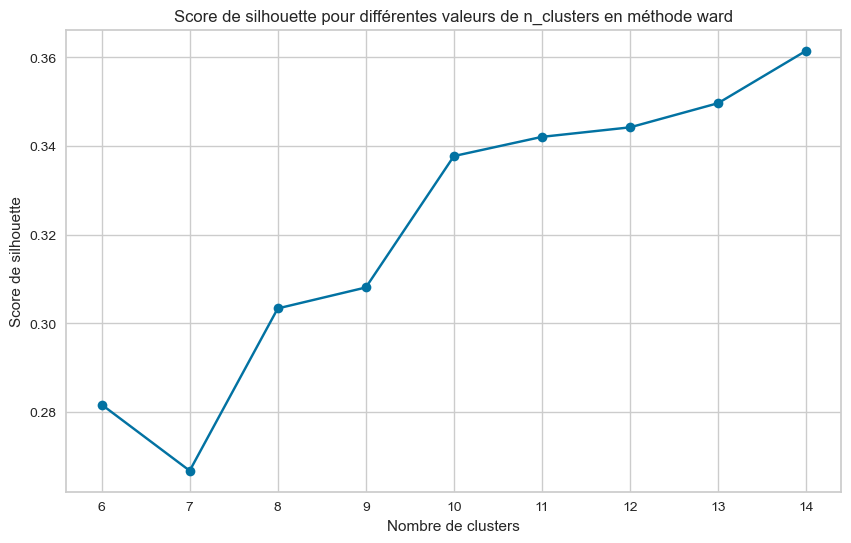

In [36]:
# Tracer le score de silhouette pour chaque nombre de clusters
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, ward_silhouette_scores, marker='o')
plt.title('Score de silhouette pour différentes valeurs de n_clusters en méthode ward')
plt.xlabel('Nombre de clusters')
plt.ylabel('Score de silhouette')
plt.show()

In [37]:
# Utiliser les centroids comme points de départ pour le clustering hiérarchique
agg = AgglomerativeClustering(n_clusters=8, linkage='ward').fit(kmeans_centroids)

# Assigner les clusters hiérarchiques à chaque centroid
hierarchical_clusters = agg.labels_

# Créer un mapping entre les clusters K-means et les clusters hiérarchiques
cluster_mapping = {i: hierarchical_clusters[i] for i in range(len(hierarchical_clusters))}

# Assigner les clusters hiérarchiques à chaque point dans les données d'origine
data['Cluster_hierar'] = [cluster_mapping[label] for label in kmeans.labels_]

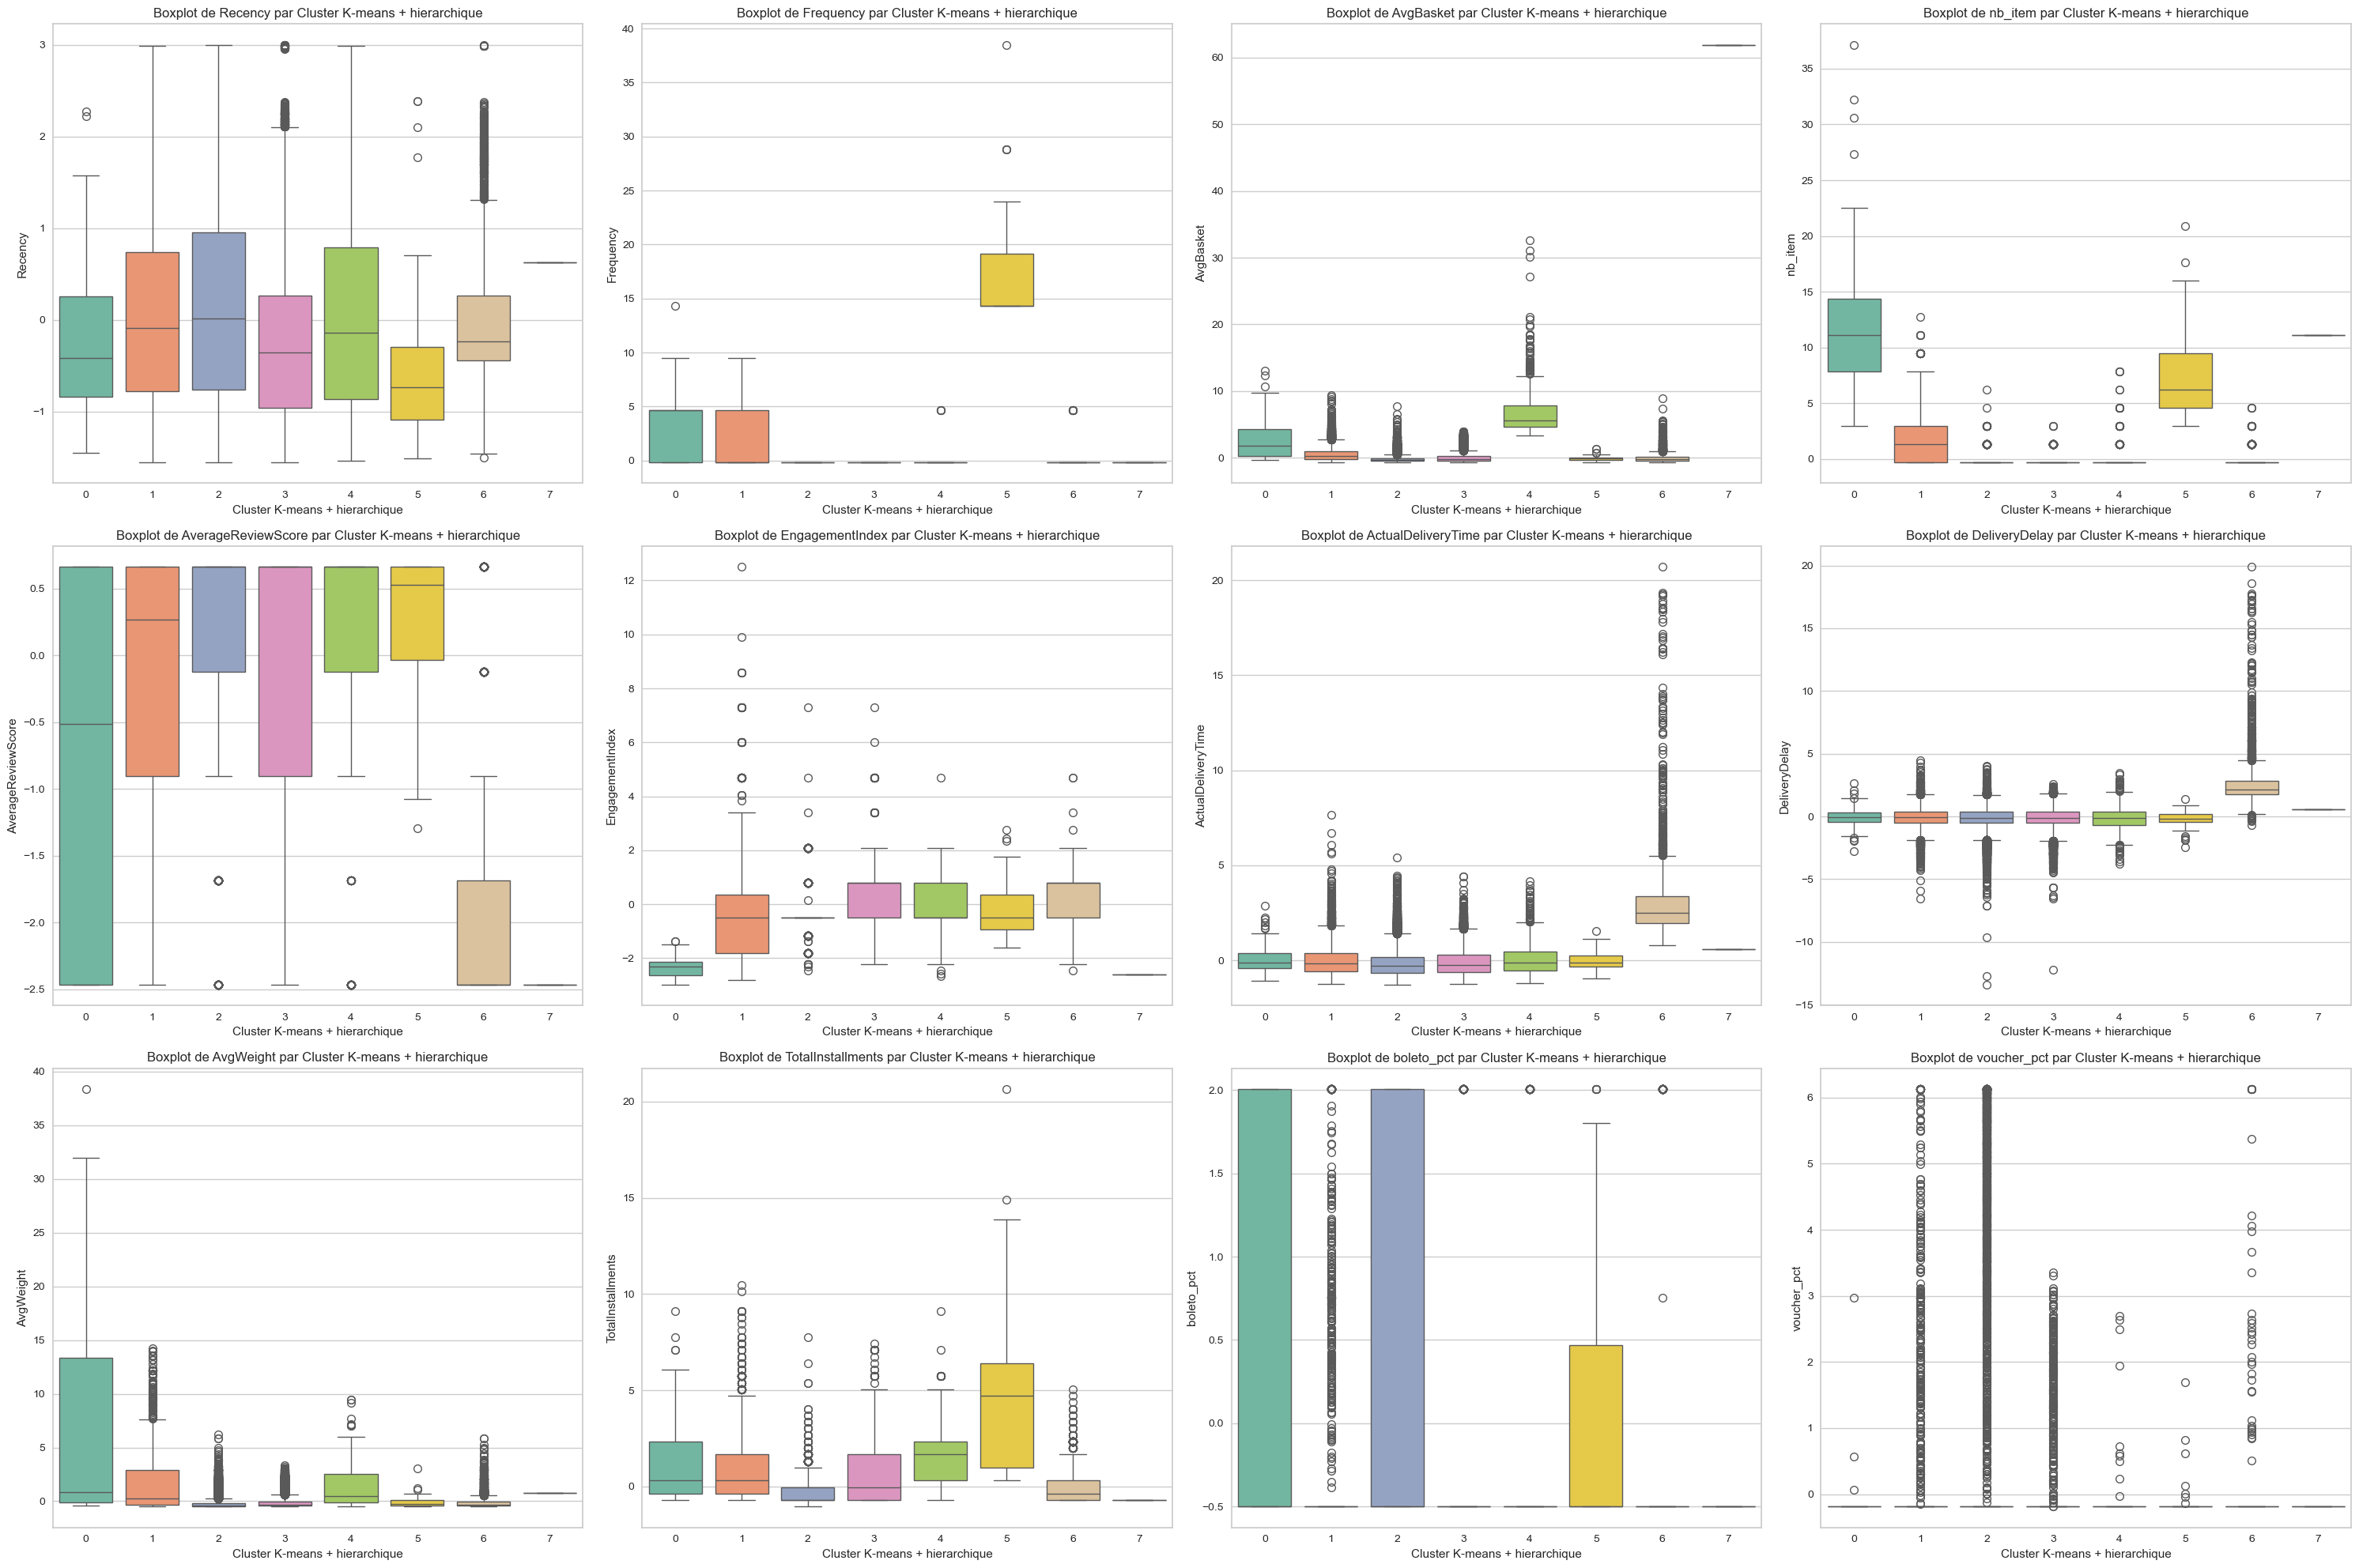

In [38]:
# Créer un boxplot pour chaque variable du dataframe en fonction des clusters
fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(30,20))
axs = axs.flatten()

for ax, column in zip(axs, features):
    sns.boxplot(x='Cluster_hierar', y=column, data=data, ax=ax, palette='Set2', hue='Cluster_hierar', legend=False)
    ax.set_xlabel('Cluster K-means + hierarchique')
    ax.set_ylabel(column)
    ax.set_title(f"Boxplot de {column} par Cluster K-means + hierarchique")

# Affichez les graphiques
plt.tight_layout()
plt.show()

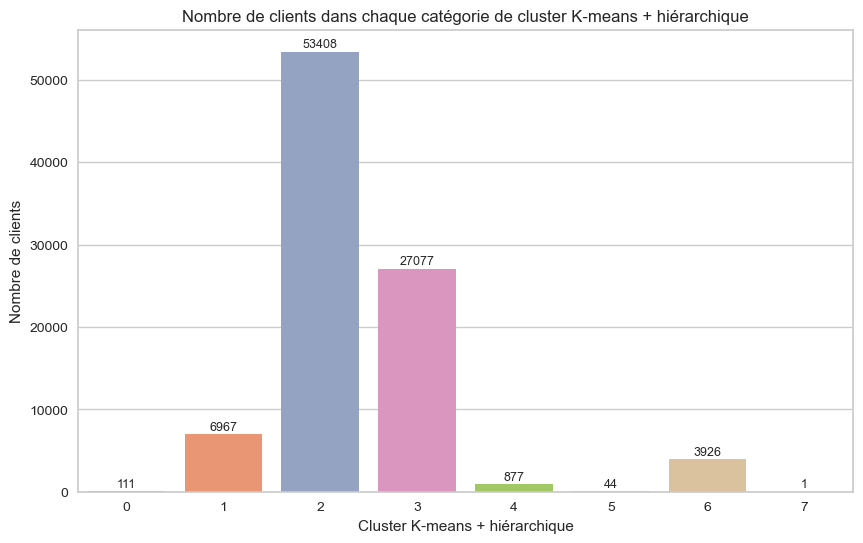

In [39]:
# Calculer le nombre de clients dans chaque catégorie de cluster
cluster_counts = data['Cluster_hierar'].value_counts()

# Créer un graphique à barres pour afficher le nombre de clients par catégorie de cluster
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='Set2', hue=cluster_counts.index, legend=False)

for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.0f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     size=9, xytext = (0, 5), 
                     textcoords = 'offset points')

plt.xlabel('Cluster K-means + hiérarchique')
plt.ylabel('Nombre de clients')
plt.title('Nombre de clients dans chaque catégorie de cluster K-means + hiérarchique')
plt.show()

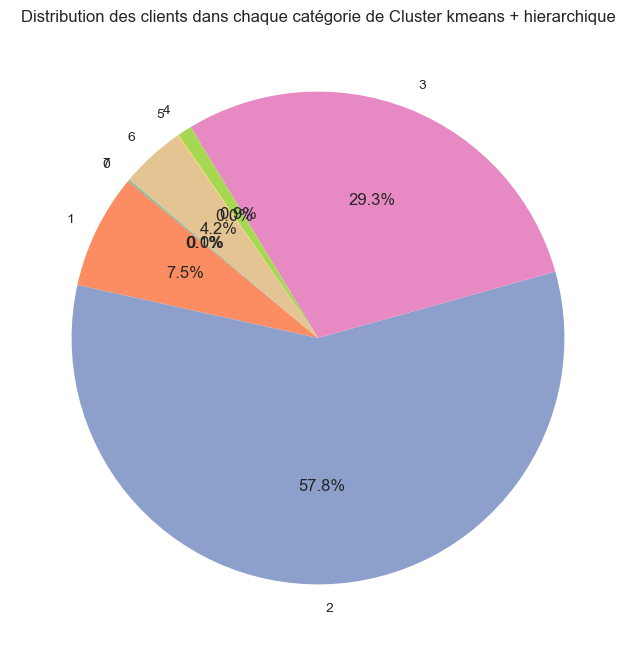

In [40]:
cluster_counts = data['Cluster_hierar'].value_counts().sort_index()

# Créer un graphique en camembert pour afficher le pourcentage de clients par catégorie de cluster
plt.figure(figsize=(8, 8))
plt.pie(cluster_counts, labels=cluster_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set2', len(cluster_counts)))
plt.title('Distribution des clients dans chaque catégorie de Cluster kmeans + hierarchique')
plt.show()

## Les clusters et profils

C'est le clustering K-means avec 8 clusters qui est le plus interessant dans cette configuration.

### Visualisation des clusters avec T-SNE

### Profils

In [41]:
def plot_cluster_medians(data, features, num_clusters, cluster_methode):
    palette = sns.color_palette("Set3", num_clusters)

    # Calculer les min et max globaux pour chaque variable
    mins = data[features].min()
    maxs = data[features].max()

    # Calculer la médiane globale de chaque caractéristique et la normaliser
    global_medians_normalized = (data[features].median() - mins) / (maxs - mins)
    global_values = global_medians_normalized.values.tolist()
    global_values += global_values[:1]

    # Calculer les angles pour chaque axe dans le radar
    num_vars = len(features)
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]

    # Nombre de lignes et de colonnes pour la grille de subplots
    num_columns = 3
    num_rows = ceil(num_clusters / num_columns)

    # Créer une grande figure pour les subplots
    fig, axs = plt.subplots(num_rows, num_columns, figsize=(18, 6 * num_rows), subplot_kw=dict(polar=True))
    axs = axs.ravel()

    for cluster in range(num_clusters):
        # Sélectionner les données du cluster courant
        cluster_data = data[data[cluster_methode] == cluster]

        # Normaliser les données du cluster
        cluster_medians_normalized = (cluster_data[features].median() - mins) / (maxs - mins)
        values = cluster_medians_normalized.values.tolist()
        values += values[:1]

        # Tracer le radar plot pour le cluster
        axs[cluster].plot(angles, values, 'o-', linewidth=2, label=f'Cluster {cluster}', color=palette[cluster])
        axs[cluster].fill(angles, values, alpha=0.25, color=palette[cluster])
        axs[cluster].plot(angles, global_values, 'k--', linewidth=1, label='Médiane globale')
        axs[cluster].set_theta_offset(np.pi / 2)
        axs[cluster].set_theta_direction(-1)
        axs[cluster].set_ylim(0, 1)
        axs[cluster].set_xticks(angles[:-1])
        axs[cluster].set_xticklabels(features, fontsize=10)
        axs[cluster].set_title(f'Cluster {cluster}', size=15, color=palette[cluster])

    for i in range(num_clusters, num_rows * num_columns):
        fig.delaxes(axs[i])

    handles, labels = axs[0].get_legend_handles_labels()
    fig.legend(handles[1:2], labels[1:2], loc='upper right', bbox_to_anchor=(1, 1))
    plt.subplots_adjust(hspace=0.1, wspace=0.5)
    plt.show()


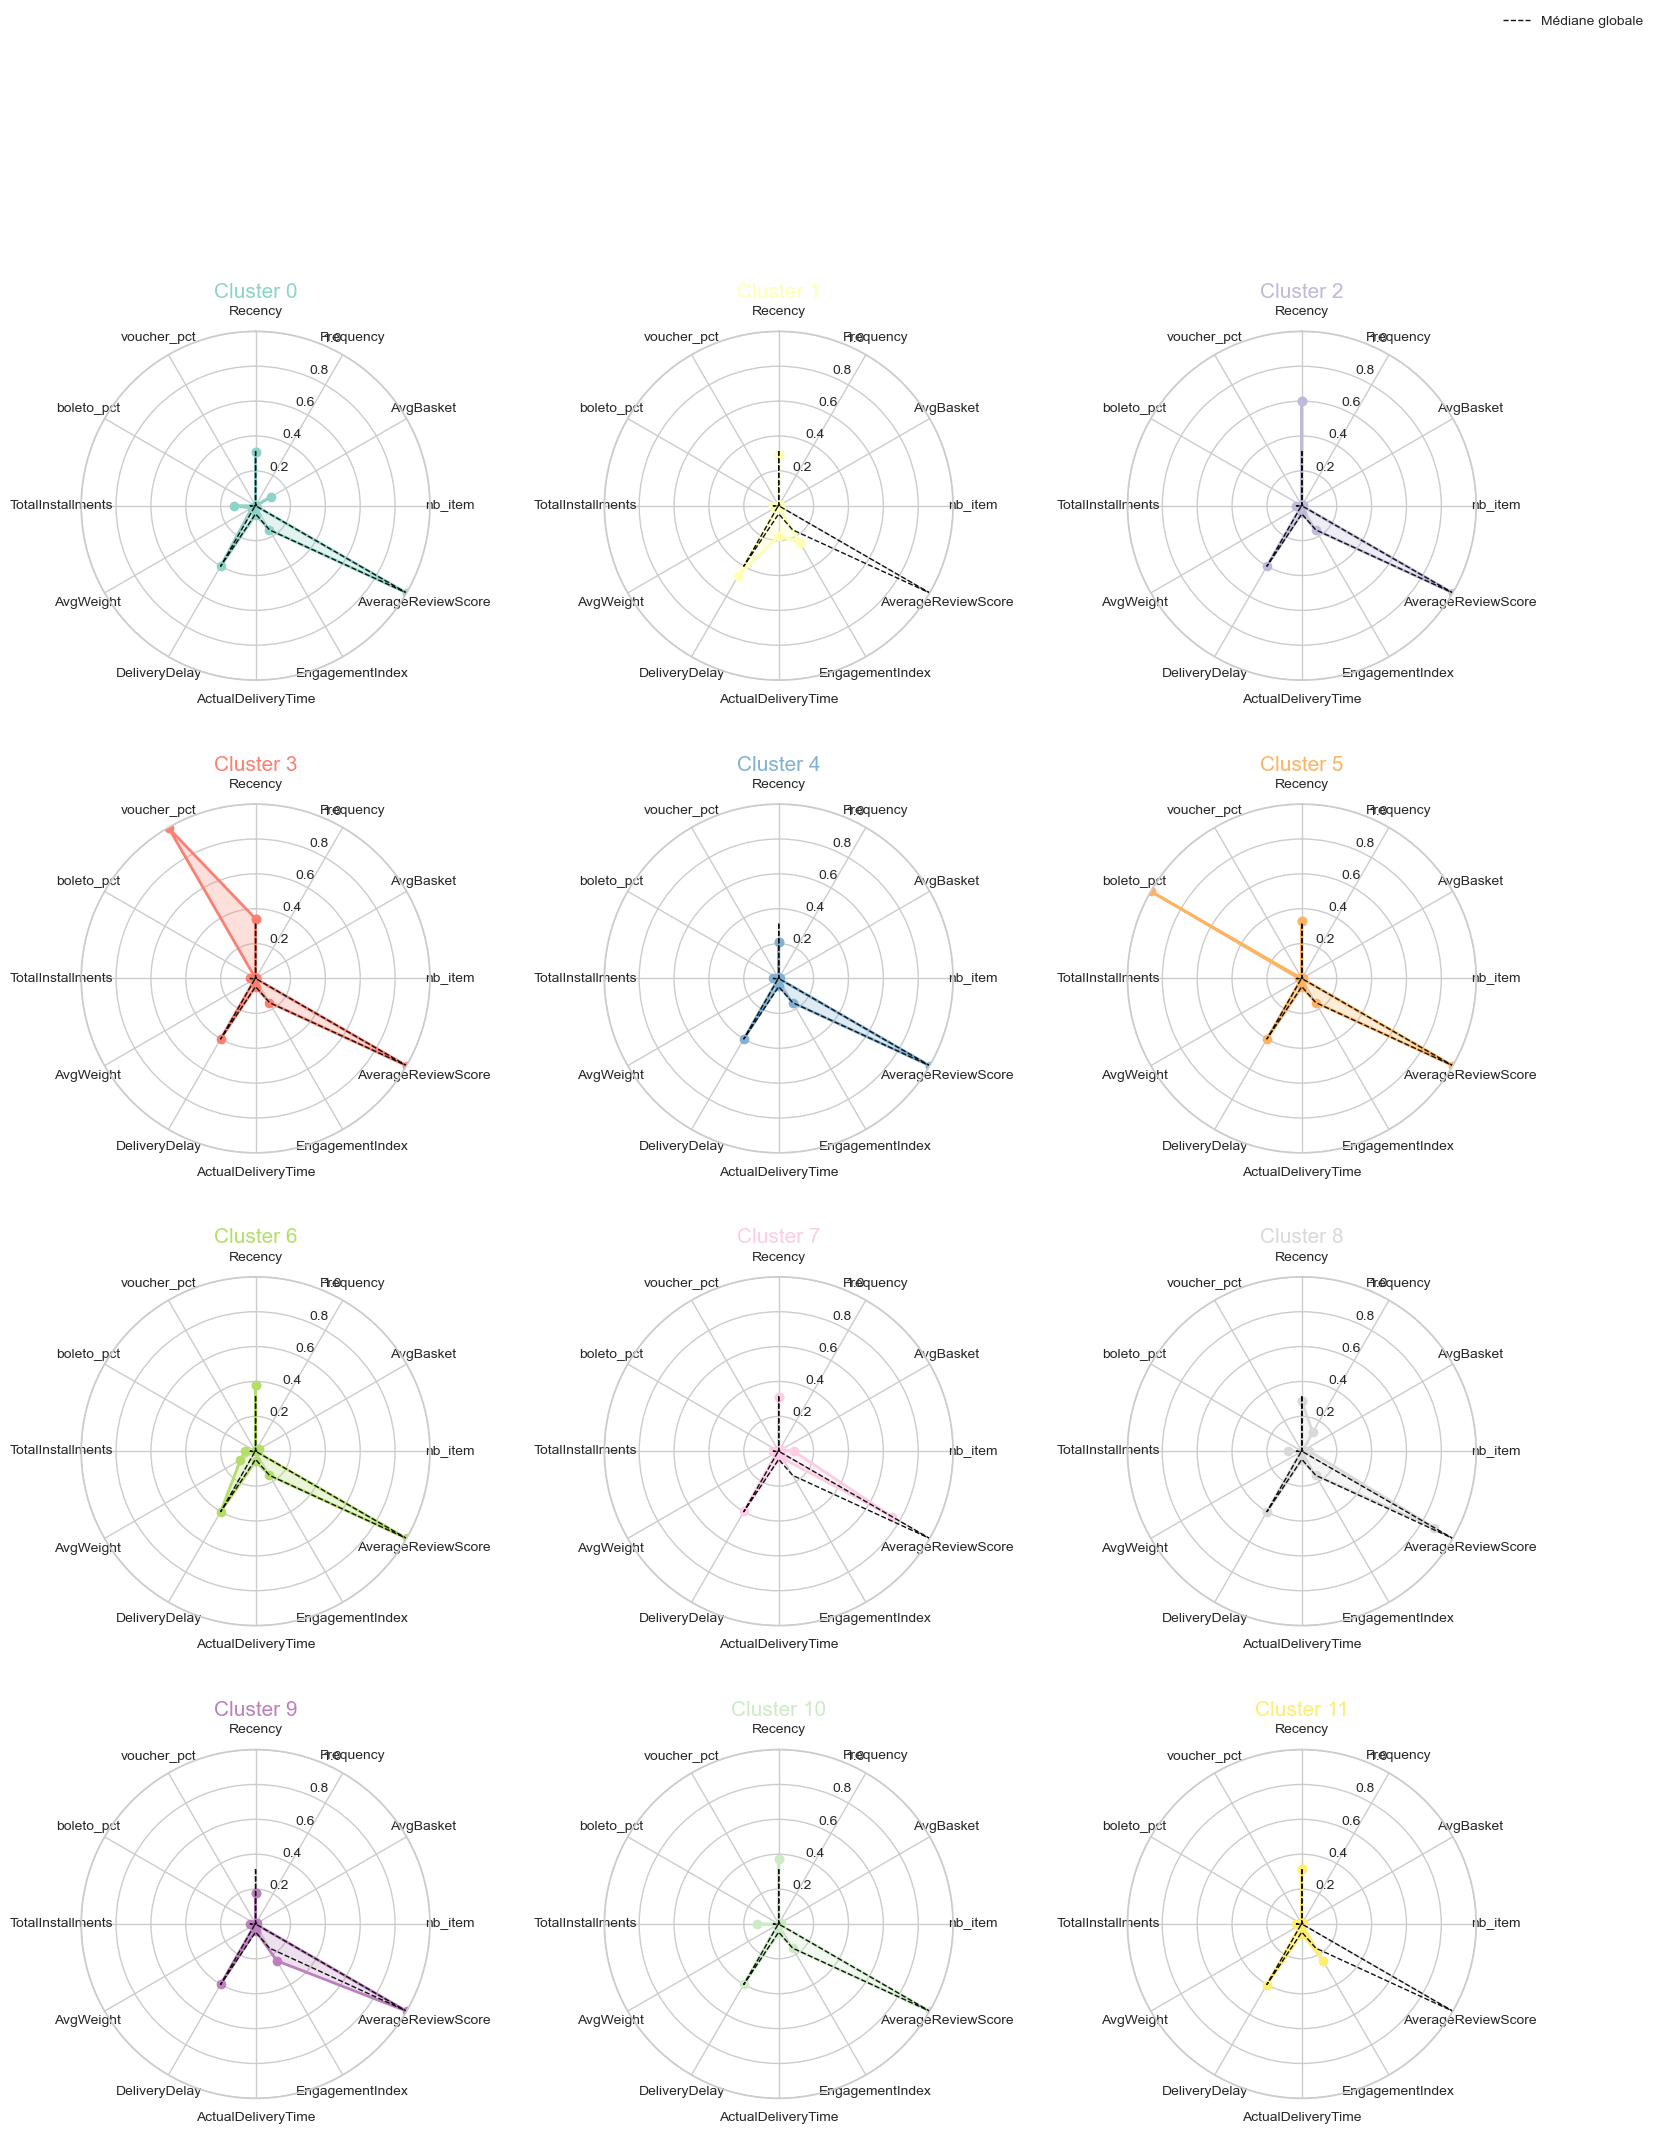

In [42]:
plot_cluster_medians(data, features, 12, 'Cluster_kmeans')

# 10 indicateurs

In [ ]:
# features à supprimer
data = data.drop(columns=[
    'AvgWeight',
    'ActualDeliveryTime',
    'Cluster_kmeans',
    'Cluster_DB',
    'Cluster_hierar'
])


In [63]:
data.columns.tolist()

['Recency',
 'Frequency',
 'AvgBasket',
 'nb_item',
 'AverageReviewScore',
 'EngagementIndex',
 'DeliveryDelay',
 'boleto_pct',
 'voucher_pct']

In [64]:
features = data.columns

## Test de différentes méthodes

### K-means

In [65]:
# Initialisation du modèle KMeans
kmeans = KMeans(n_clusters=5, random_state=42,n_init=10)
kmeans.fit(data[features])

# Récupération des étiquettes de cluster pour chaque point de données
data['Cluster_kmeans'] = kmeans.labels_

data.head()


Recency  Frequency  AvgBasket   nb_item  AverageReviewScore  \
0 -0.823824  -0.166833  -0.083401 -0.291761            0.661413   
1 -0.804152  -0.166833  -0.609331 -0.291761           -0.120032   
2  1.963167  -0.166833  -0.338687 -0.291761           -0.901478   
3  0.546720  -0.166833  -0.534002 -0.291761           -0.120032   
4  0.330318  -0.166833   0.168721 -0.291761            0.661413   

   EngagementIndex  DeliveryDelay  boleto_pct  voucher_pct  Cluster_kmeans  
0         2.095657       0.700191    -0.50049     -0.18714               2  
1        -0.504750       0.688748    -0.50049     -0.18714               2  
2        -0.504750       0.972637    -0.50049     -0.18714               1  
3         0.795453       0.007344    -0.50049     -0.18714               2  
4        -0.504750       0.411915    -0.50049     -0.18714               2

In [66]:
score = silhouette_score(data[features], data['Cluster_kmeans'], n_jobs=-1)
print('Silhouette Score:', score)


Silhouette Score: 0.2894463659277811


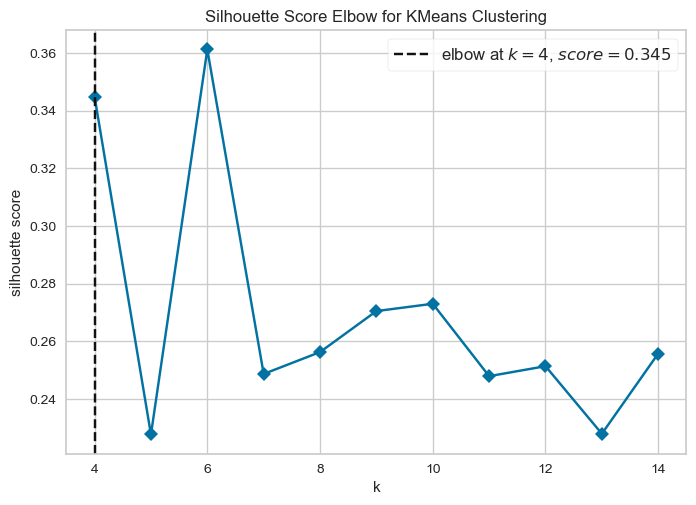

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [67]:
visualizer = KElbowVisualizer(KMeans(random_state=42, n_init=11), k=(4,15), metric='silhouette', timings=False, n_jobs=-1)
visualizer.fit(data)    
visualizer.show()

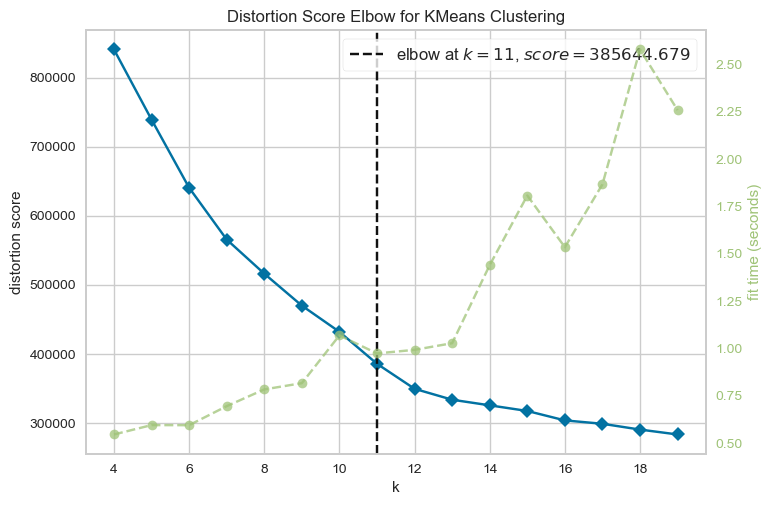

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [68]:
# distortion 
visualizer = KElbowVisualizer(KMeans(random_state=42, n_init=10), k=(4,20))
visualizer.fit(X)   
visualizer.poof()   

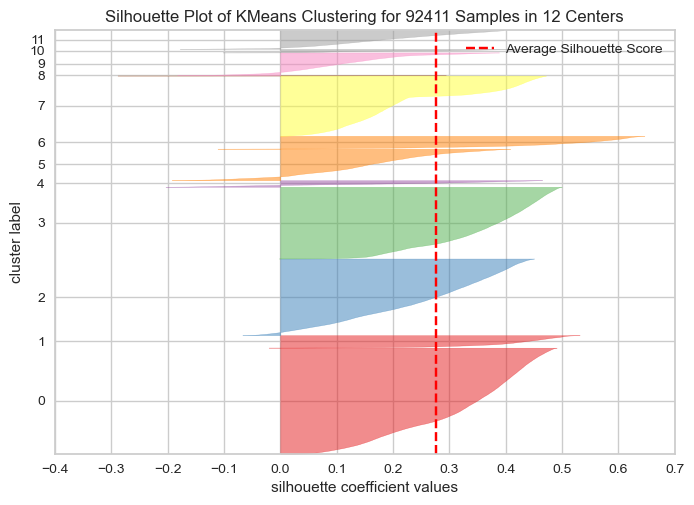

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 92411 Samples in 12 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [69]:
visualizer = SilhouetteVisualizer(KMeans(n_clusters=12, random_state=42, n_init=10))
visualizer.fit(data)
visualizer.show()

In [70]:
# Initialisation du modèle KMeans
kmeans = KMeans(n_clusters=12, random_state=42,n_init=10)
kmeans.fit(data[features])

# Récupération des étiquettes de cluster pour chaque point de données
data['Cluster_kmeans'] = kmeans.labels_

In [71]:
# Calculer le score de Davies-Bouldin
X = data[features] 
labels = data['Cluster_kmeans'] 
davies_bouldin = davies_bouldin_score(X, labels)

print(f"Le score de Davies-Bouldin pour le clustering KMeans est : {davies_bouldin}")

Le score de Davies-Bouldin pour le clustering KMeans est : 1.2278487307488013


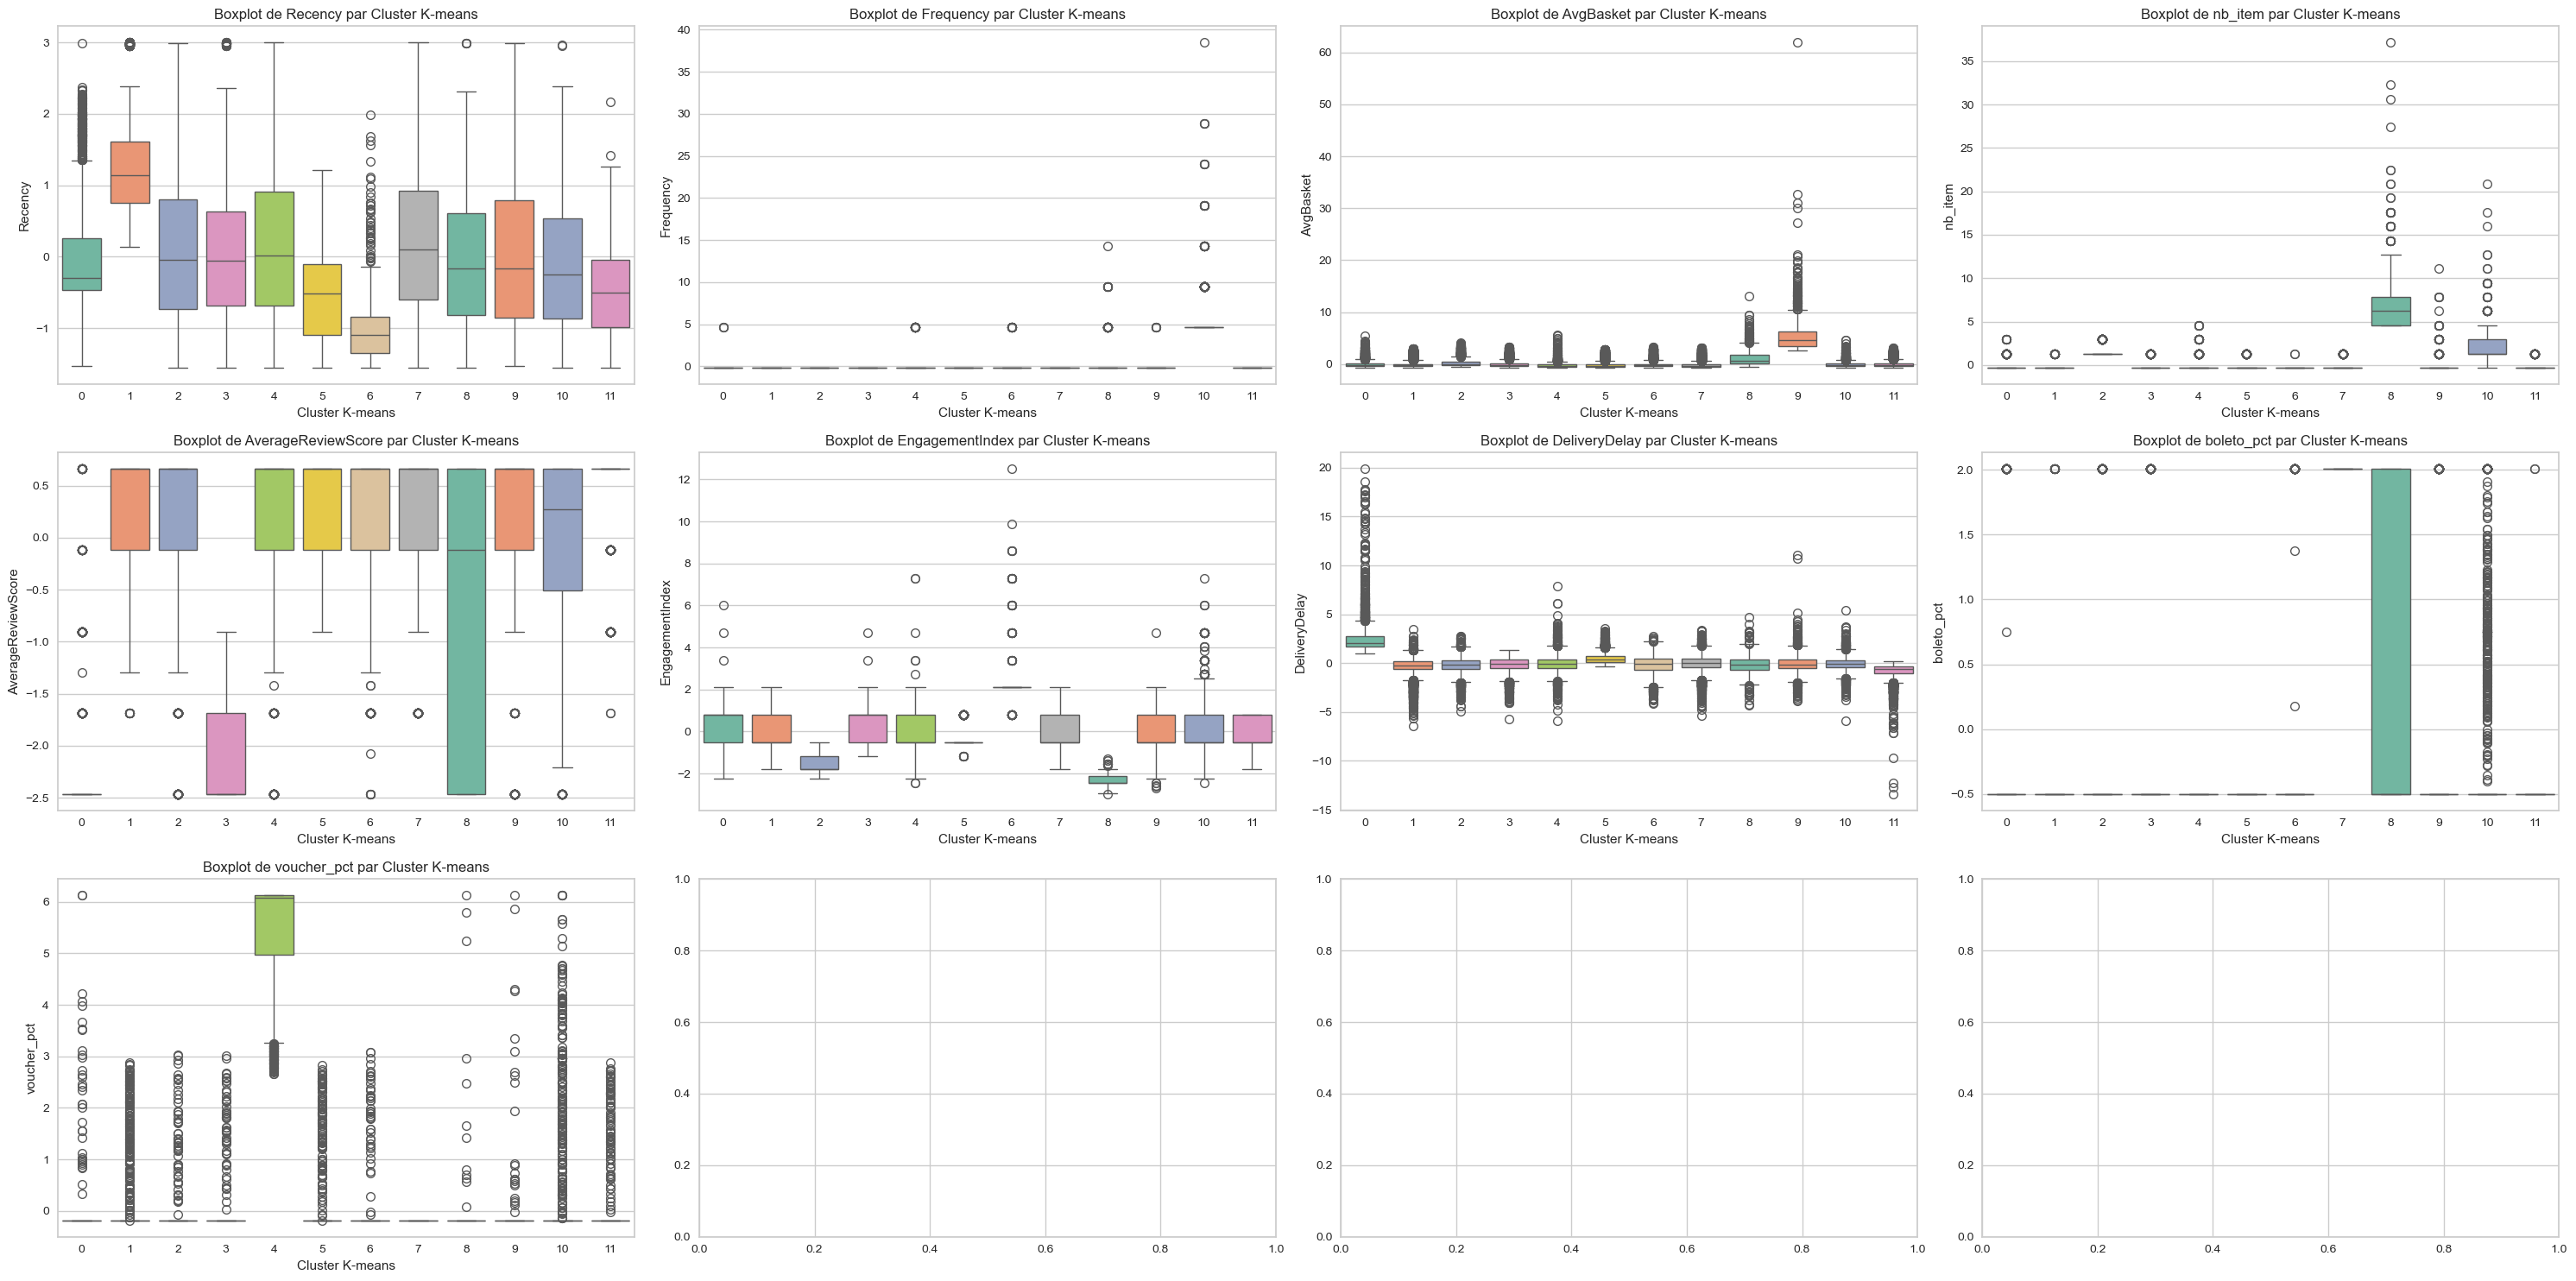

In [72]:
# Créer un boxplot pour chaque variable du dataframe en fonction des clusters
fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(30,15))
axs = axs.flatten()

for ax, column in zip(axs, features):
    sns.boxplot(x='Cluster_kmeans', y=column, data=data, ax=ax, palette='Set2', hue='Cluster_kmeans', legend=False)
    ax.set_xlabel('Cluster K-means')
    ax.set_ylabel(column)
    ax.set_title(f"Boxplot de {column} par Cluster K-means")

# Affichez les graphiques
plt.tight_layout()
plt.show()


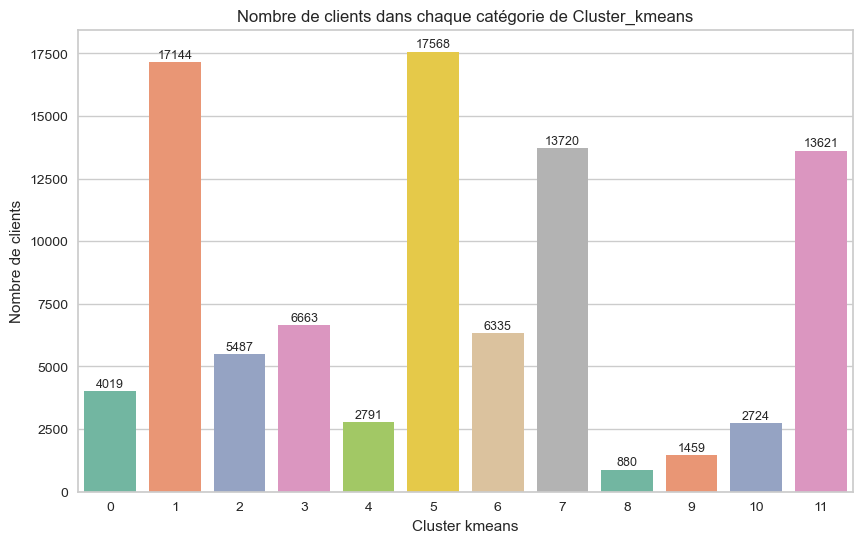

In [73]:
# Calculer le nombre de clients dans chaque catégorie de cluster
cluster_counts = data['Cluster_kmeans'].value_counts()

# Créer un graphique à barres pour afficher le nombre de clients par catégorie de cluster
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='Set2', hue=cluster_counts.index,legend=False)

for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.0f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     size=9, xytext = (0, 5), 
                     textcoords = 'offset points')

plt.xlabel('Cluster kmeans')
plt.ylabel('Nombre de clients')
plt.title('Nombre de clients dans chaque catégorie de Cluster_kmeans')
plt.show()

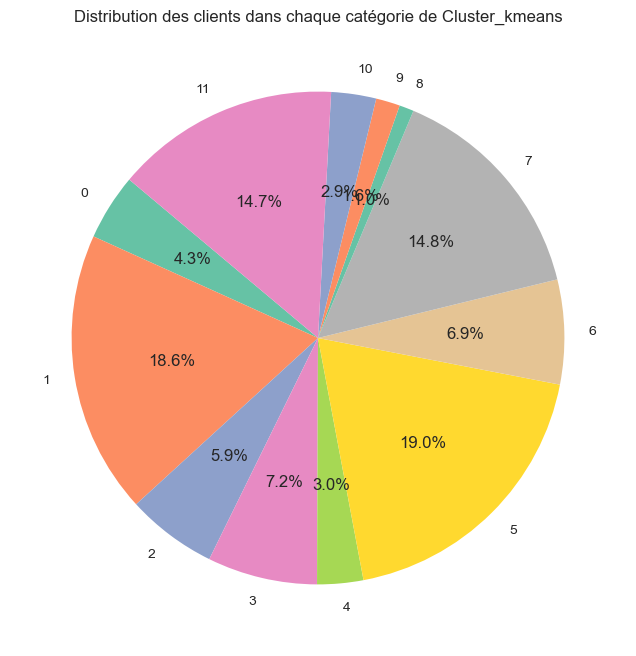

In [74]:
cluster_counts = data['Cluster_kmeans'].value_counts().sort_index()

# Créer un graphique en camembert pour afficher le pourcentage de clients par catégorie de cluster
plt.figure(figsize=(8, 8))
plt.pie(cluster_counts, labels=cluster_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set2', len(cluster_counts)))
plt.title('Distribution des clients dans chaque catégorie de Cluster_kmeans')
plt.show()

### DBSCAN

In [75]:
# Initialisation du modèle DBSCAN
dbscan = DBSCAN(eps=1.2, min_samples=200, n_jobs=-1)  
dbscan.fit(data[features])

# Récupération des étiquettes de cluster pour chaque point de données
data['Cluster_DB'] = dbscan.labels_  # -1 signifie bruit


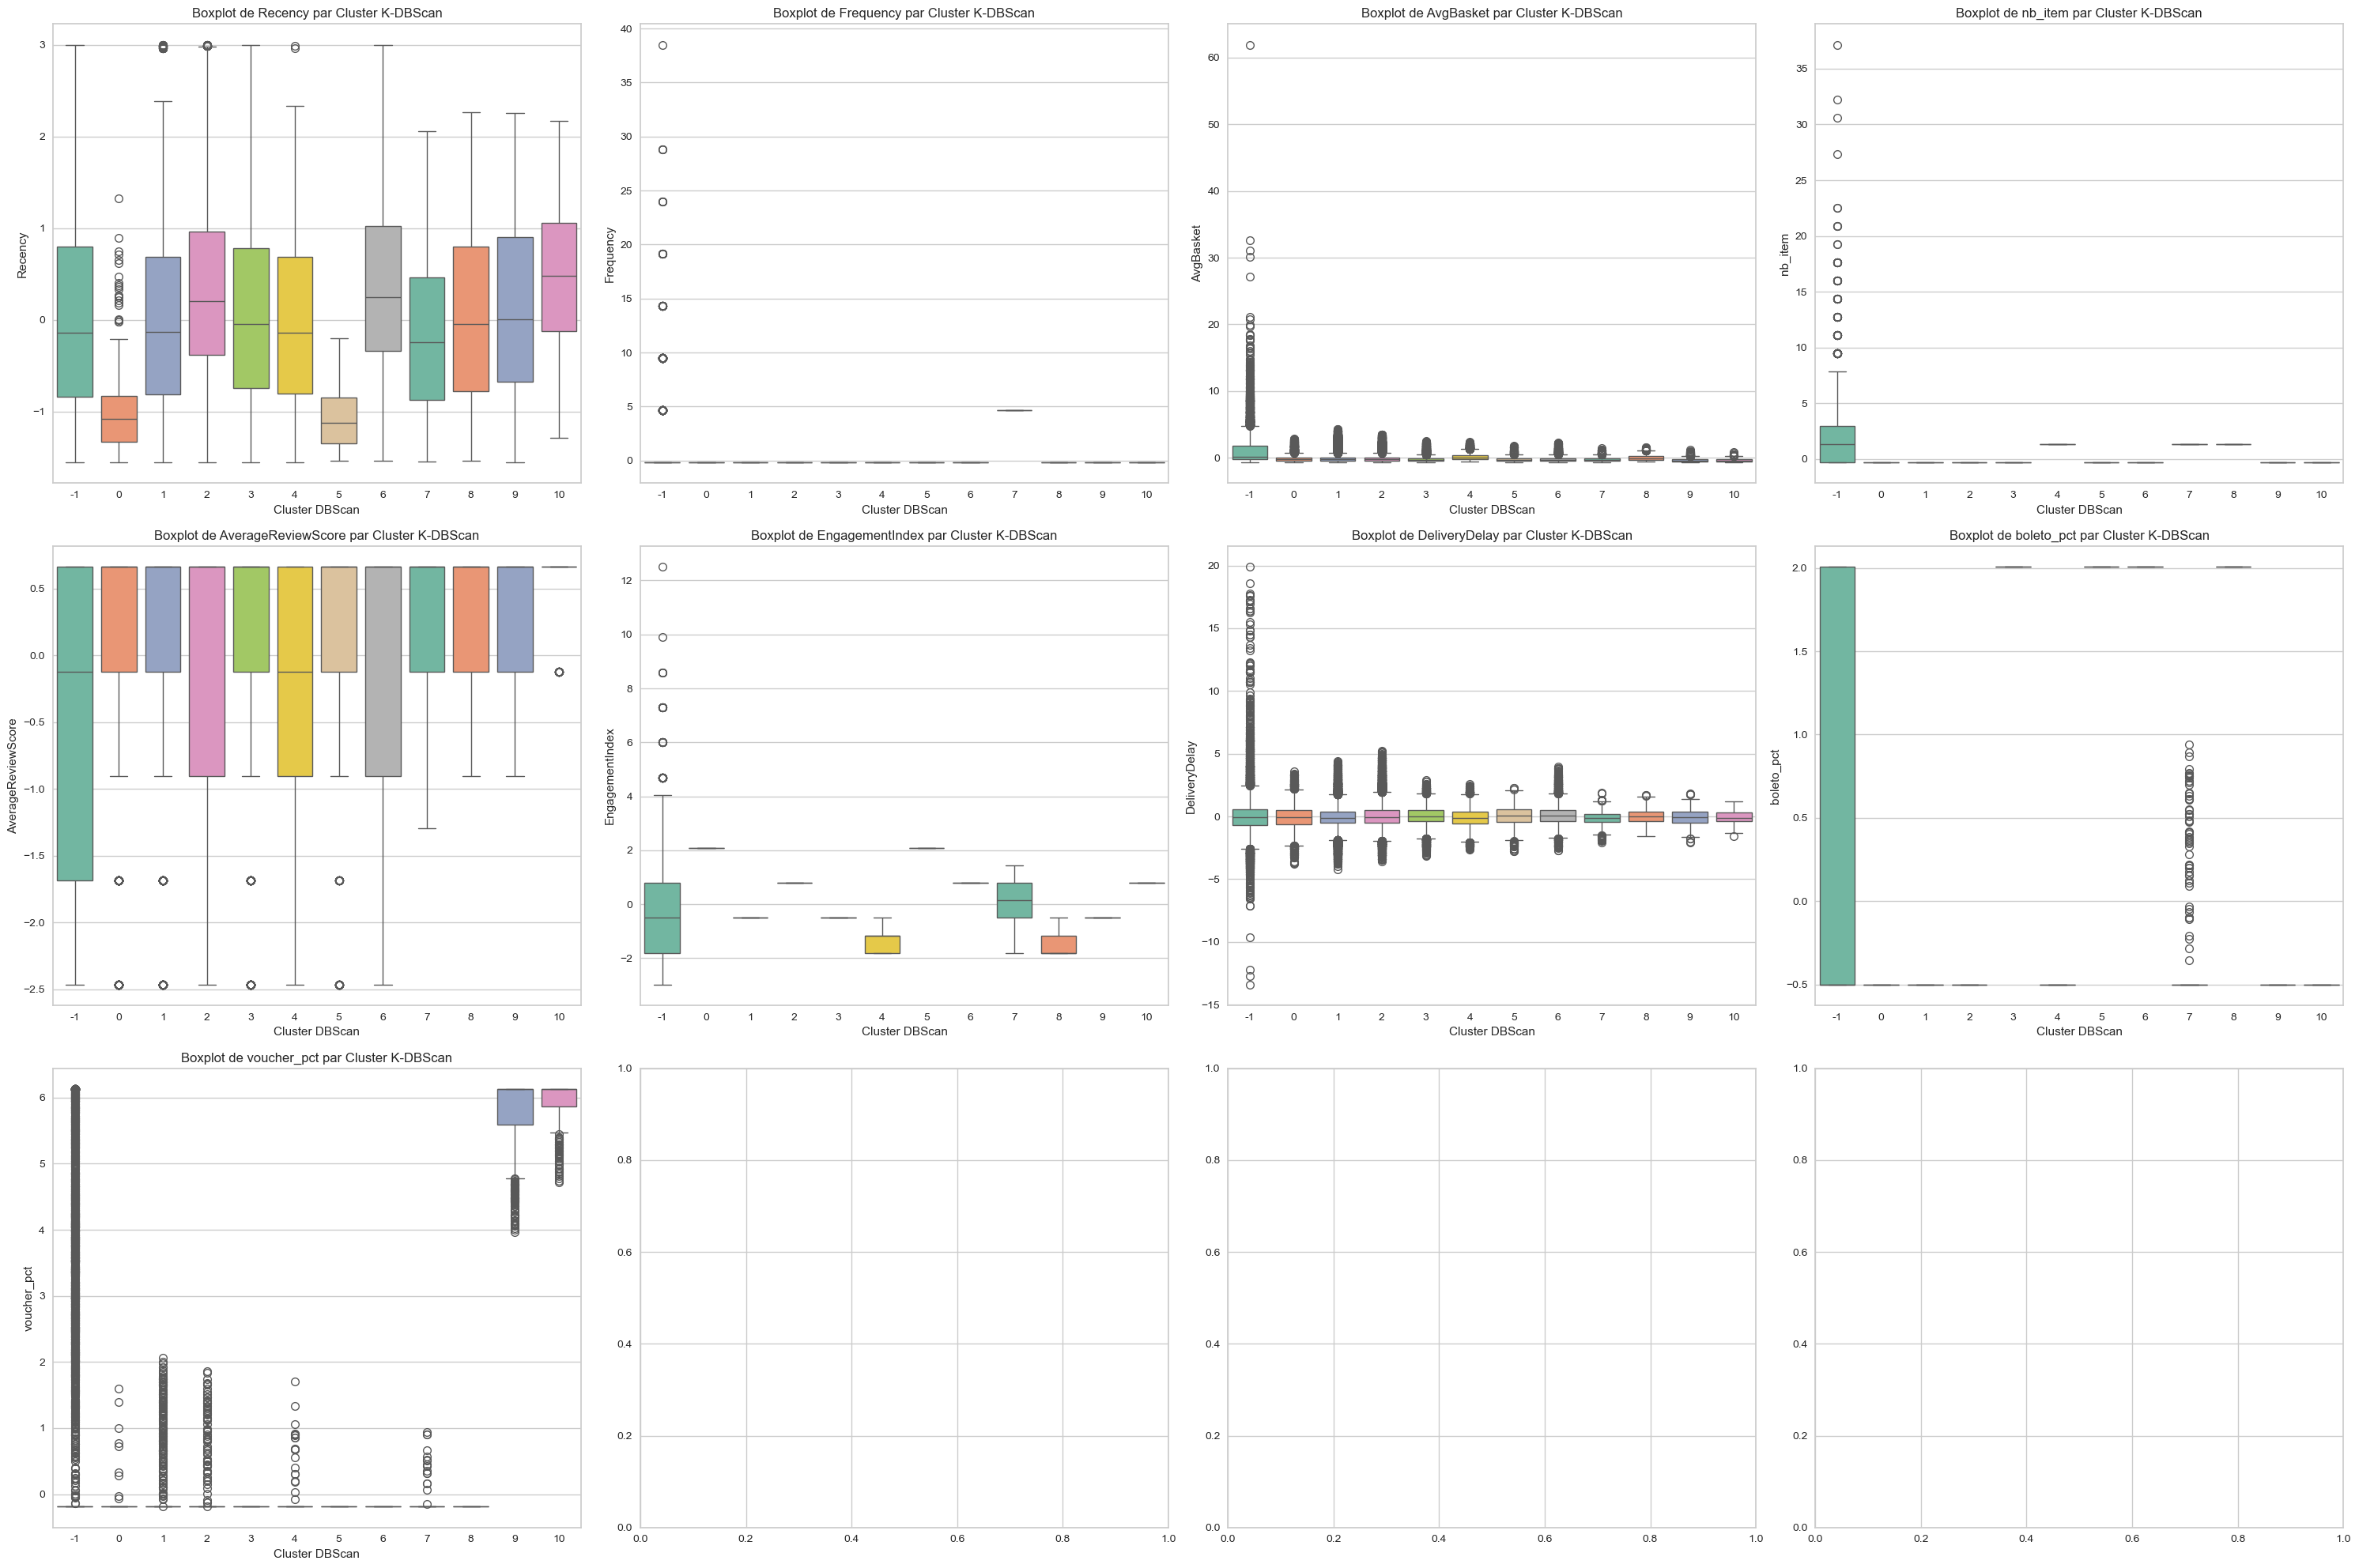

In [76]:
# Créer un boxplot pour chaque variable du dataframe en fonction des clusters
fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(30,20))
axs = axs.flatten()

for ax, column in zip(axs, features):
    sns.boxplot(x='Cluster_DB', y=column, data=data, ax=ax, palette='Set2', hue='Cluster_DB', legend=False)
    ax.set_xlabel('Cluster DBScan')
    ax.set_ylabel(column)
    ax.set_title(f"Boxplot de {column} par Cluster K-DBScan")

# Affichez les graphiques
plt.tight_layout()
plt.show()

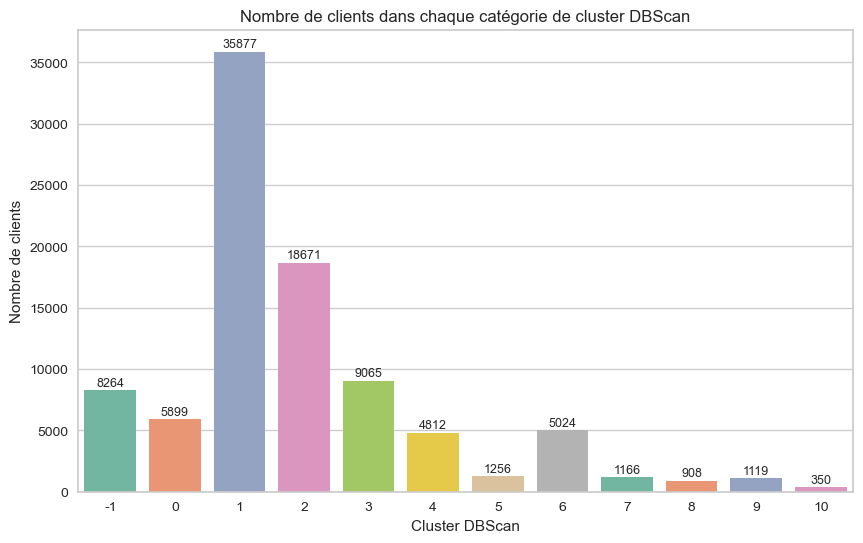

In [77]:
# Calculer le nombre de clients dans chaque catégorie de cluster
cluster_counts = data['Cluster_DB'].value_counts()

# Créer un graphique à barres pour afficher le nombre de clients par catégorie de cluster
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='Set2', hue=cluster_counts.index,legend=False)

for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.0f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     size=9, xytext = (0, 5), 
                     textcoords = 'offset points')

plt.xlabel('Cluster DBScan')
plt.ylabel('Nombre de clients')
plt.title('Nombre de clients dans chaque catégorie de cluster DBScan')

plt.show()

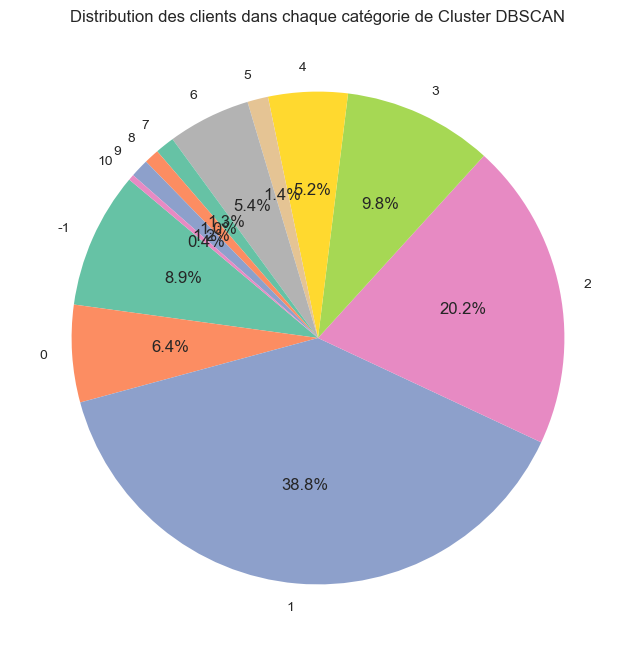

In [78]:
cluster_counts = data['Cluster_DB'].value_counts().sort_index()

# Créer un graphique en camembert pour afficher le pourcentage de clients par catégorie de cluster
plt.figure(figsize=(8, 8))
plt.pie(cluster_counts, labels=cluster_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set2', len(cluster_counts)))
plt.title('Distribution des clients dans chaque catégorie de Cluster DBSCAN')
plt.show()

### K-means + hierarchique

In [79]:
# Effectuer K-means avec 500 clusters
kmeans = KMeans(n_clusters=500, n_init=10, random_state=42)
kmeans.fit(data)

# Obtenir les centroids des clusters K-means
kmeans_centroids = kmeans.cluster_centers_

In [80]:
range_n_clusters = range(5, 18)  

In [81]:
# Ward
ward_silhouette_scores = []
for n_clusters in range_n_clusters:
    # Créer et ajuster le modèle AgglomerativeClustering
    clusterer = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
    cluster_labels = clusterer.fit_predict(kmeans_centroids)
    
    # Calculer le score de silhouette
    silhouette_avg = silhouette_score(kmeans_centroids, cluster_labels)
    ward_silhouette_scores.append(silhouette_avg)
    print(f"Pour n_clusters = {n_clusters}, le score de silhouette moyen est : {silhouette_avg}")

Pour n_clusters = 5, le score de silhouette moyen est : 0.23765946401172536
Pour n_clusters = 6, le score de silhouette moyen est : 0.26468628065448513
Pour n_clusters = 7, le score de silhouette moyen est : 0.26882745969879907
Pour n_clusters = 8, le score de silhouette moyen est : 0.23523452117907828
Pour n_clusters = 9, le score de silhouette moyen est : 0.25540168195097385
Pour n_clusters = 10, le score de silhouette moyen est : 0.25988630463249107
Pour n_clusters = 11, le score de silhouette moyen est : 0.2698569894543081
Pour n_clusters = 12, le score de silhouette moyen est : 0.29505805699686755
Pour n_clusters = 13, le score de silhouette moyen est : 0.2958233646401941
Pour n_clusters = 14, le score de silhouette moyen est : 0.3095541001145219
Pour n_clusters = 15, le score de silhouette moyen est : 0.32256332244827784
Pour n_clusters = 16, le score de silhouette moyen est : 0.32865442759650054
Pour n_clusters = 17, le score de silhouette moyen est : 0.33693965084740835


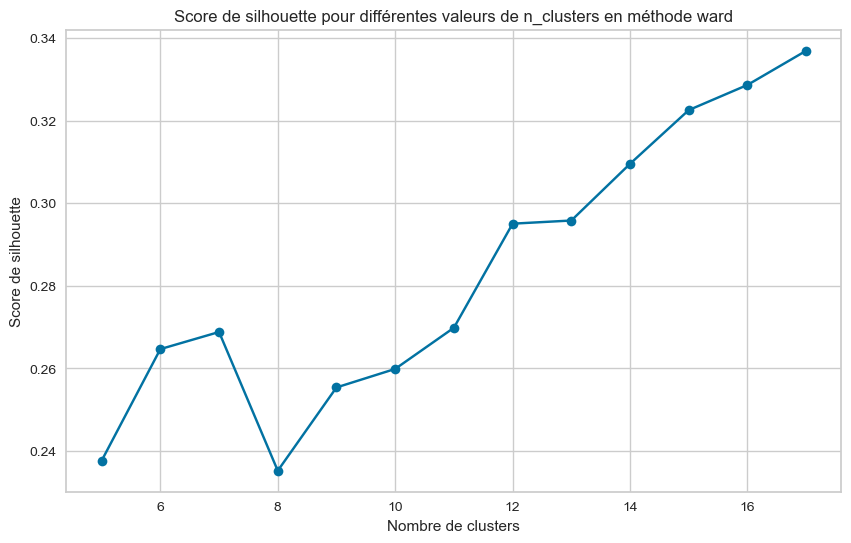

In [82]:
# Tracer le score de silhouette pour chaque nombre de clusters
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, ward_silhouette_scores, marker='o')
plt.title('Score de silhouette pour différentes valeurs de n_clusters en méthode ward')
plt.xlabel('Nombre de clusters')
plt.ylabel('Score de silhouette')
plt.show()

In [83]:
# Utiliser les centroids comme points de départ pour le clustering hiérarchique
agg = AgglomerativeClustering(n_clusters=12, linkage='ward').fit(kmeans_centroids)

# Assigner les clusters hiérarchiques à chaque centroid
hierarchical_clusters = agg.labels_

# Créer un mapping entre les clusters K-means et les clusters hiérarchiques
cluster_mapping = {i: hierarchical_clusters[i] for i in range(len(hierarchical_clusters))}

# Assigner les clusters hiérarchiques à chaque point dans les données d'origine
data['Cluster_hierar'] = [cluster_mapping[label] for label in kmeans.labels_]

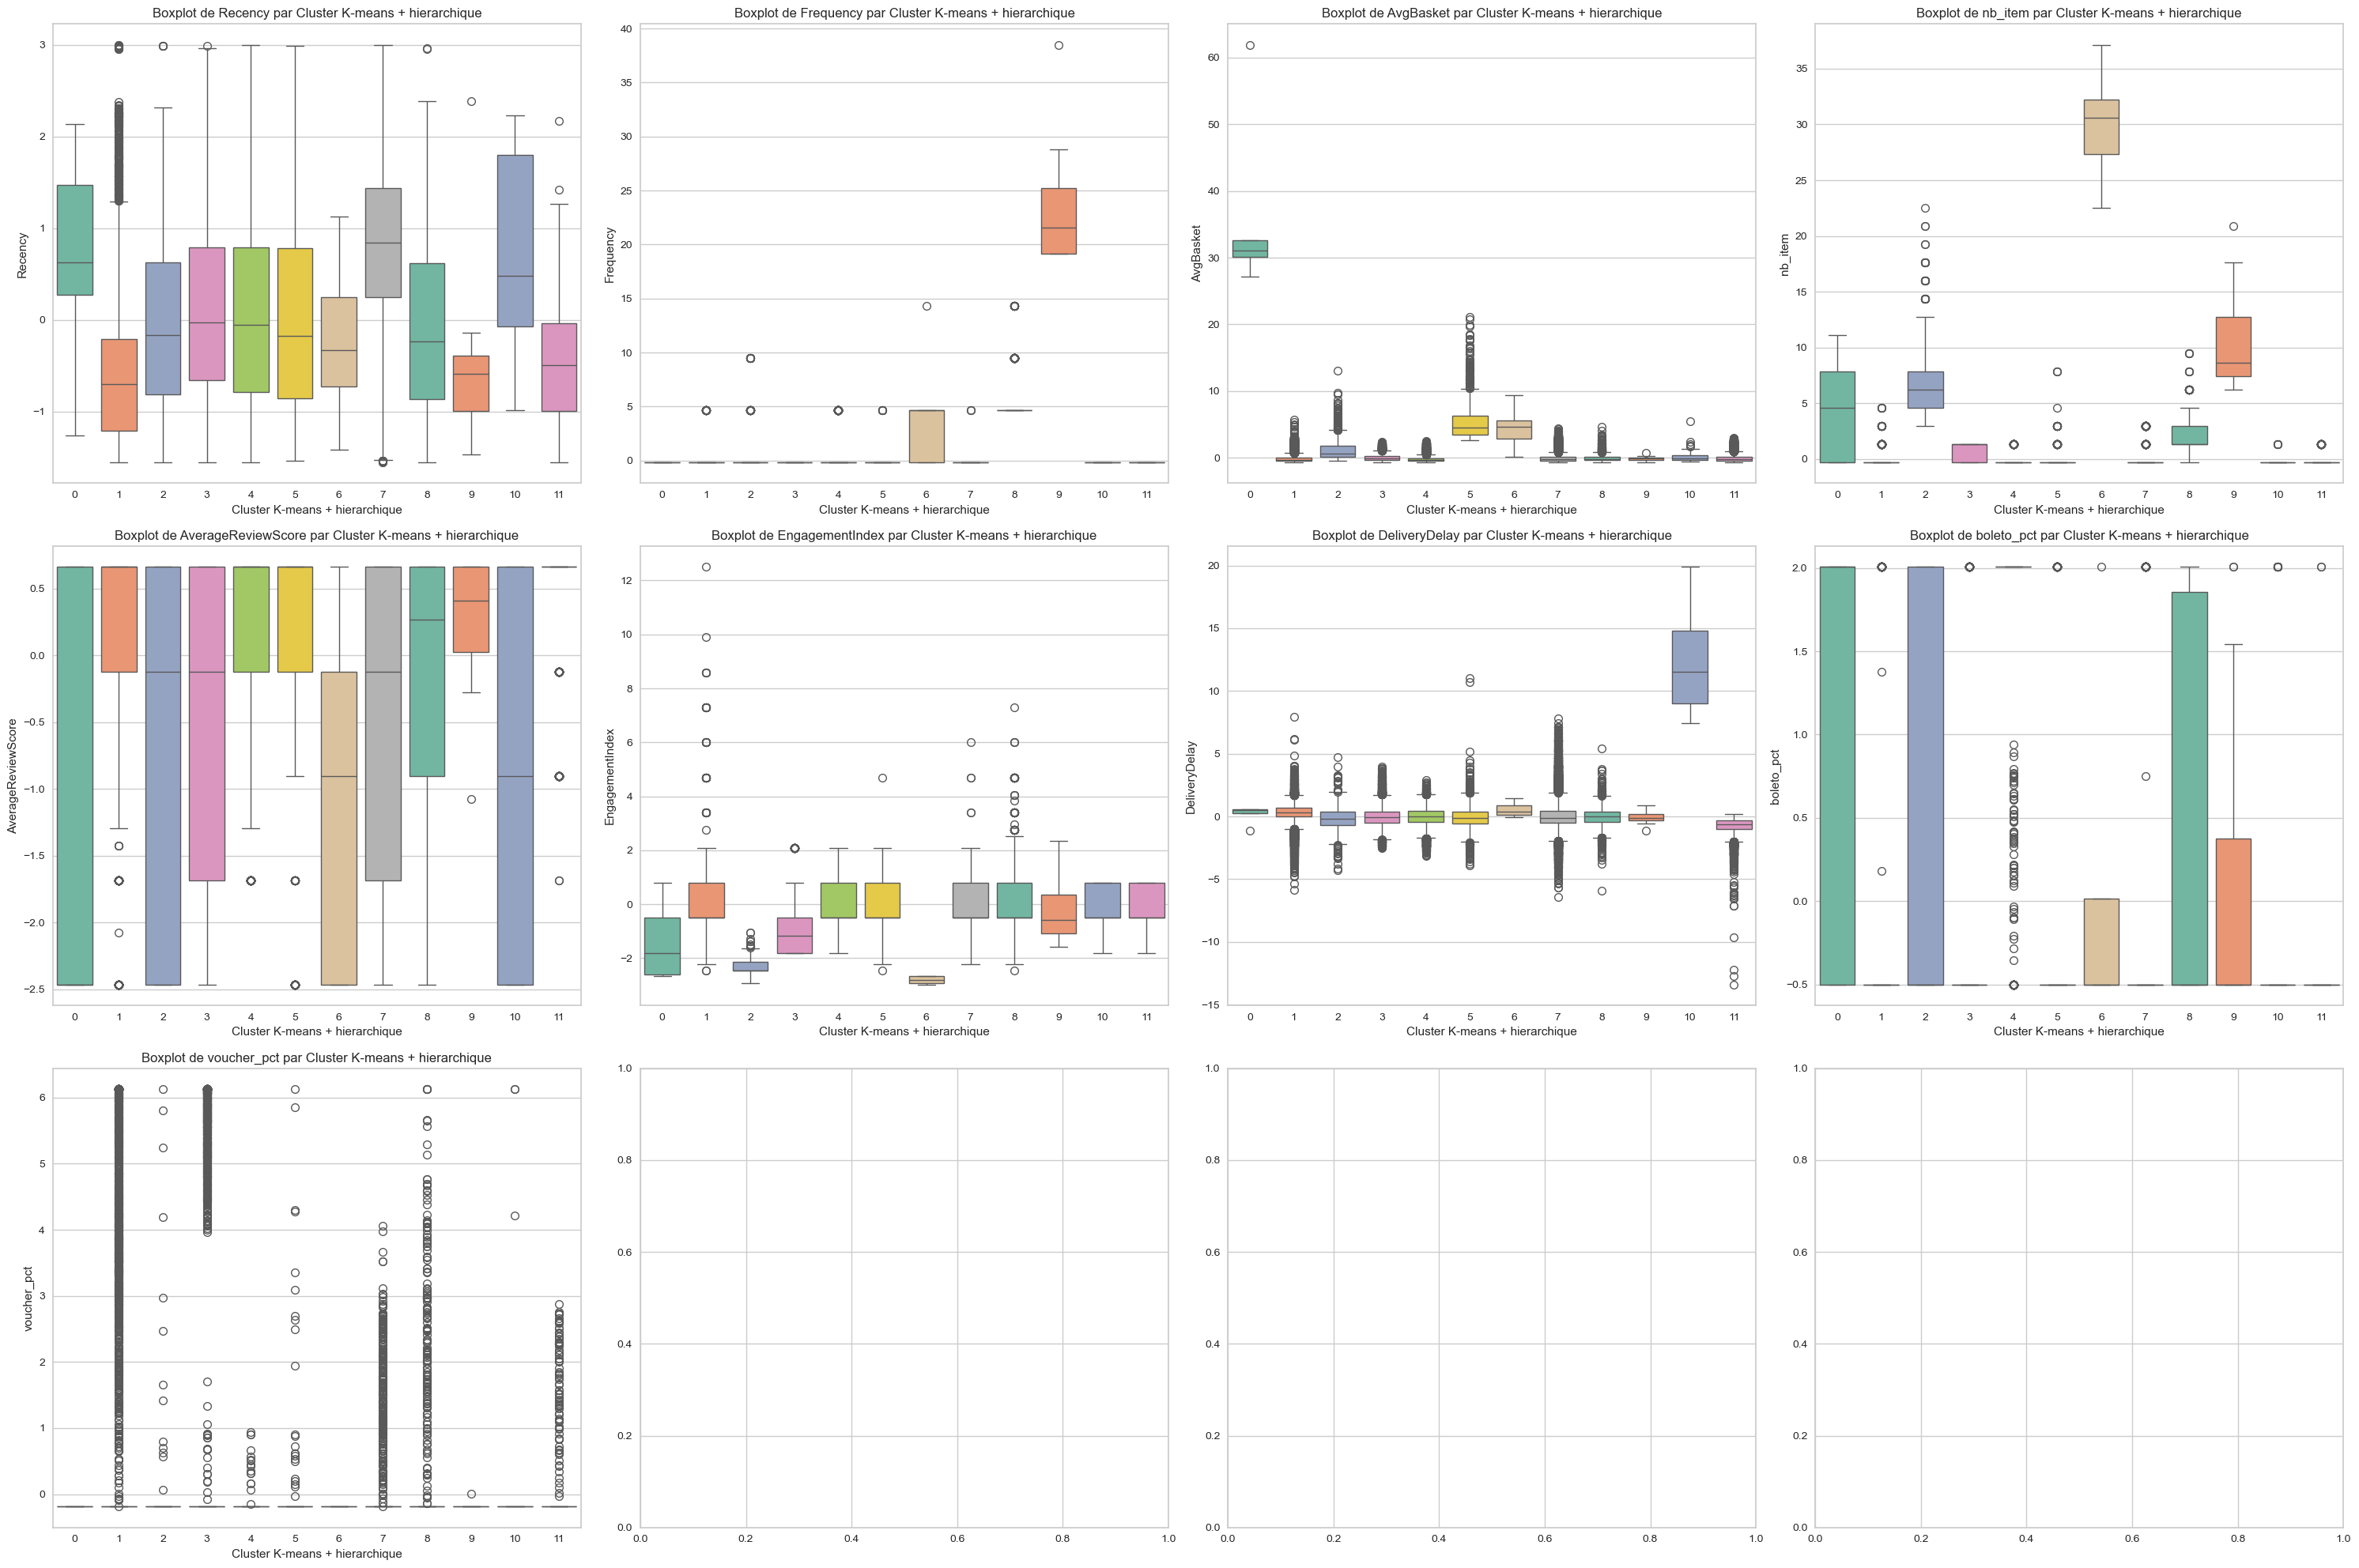

In [84]:
# Créer un boxplot pour chaque variable du dataframe en fonction des clusters
fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(30,20))
axs = axs.flatten()

for ax, column in zip(axs, features):
    sns.boxplot(x='Cluster_hierar', y=column, data=data, ax=ax, palette='Set2', hue='Cluster_hierar', legend=False)
    ax.set_xlabel('Cluster K-means + hierarchique')
    ax.set_ylabel(column)
    ax.set_title(f"Boxplot de {column} par Cluster K-means + hierarchique")

# Affichez les graphiques
plt.tight_layout()
plt.show()

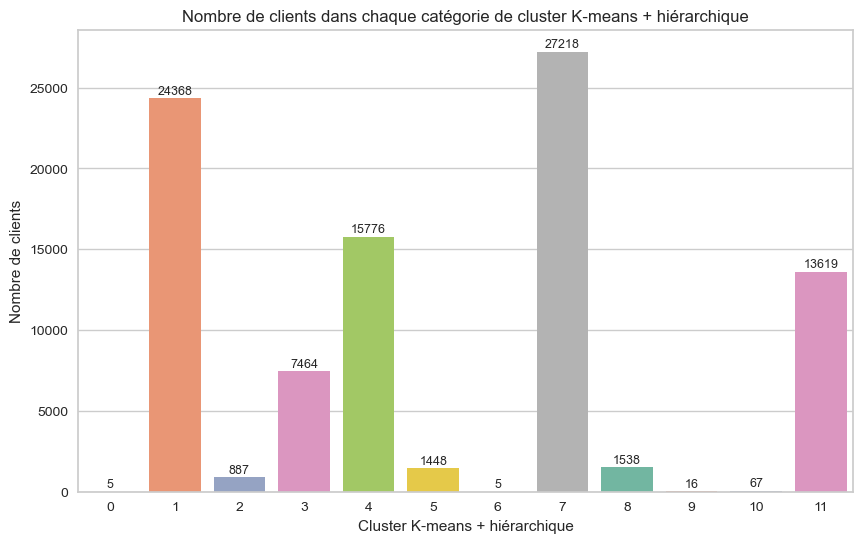

In [85]:
# Calculer le nombre de clients dans chaque catégorie de cluster
cluster_counts = data['Cluster_hierar'].value_counts()

# Créer un graphique à barres pour afficher le nombre de clients par catégorie de cluster
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='Set2', hue=cluster_counts.index, legend=False)

for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.0f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     size=9, xytext = (0, 5), 
                     textcoords = 'offset points')

plt.xlabel('Cluster K-means + hiérarchique')
plt.ylabel('Nombre de clients')
plt.title('Nombre de clients dans chaque catégorie de cluster K-means + hiérarchique')
plt.show()

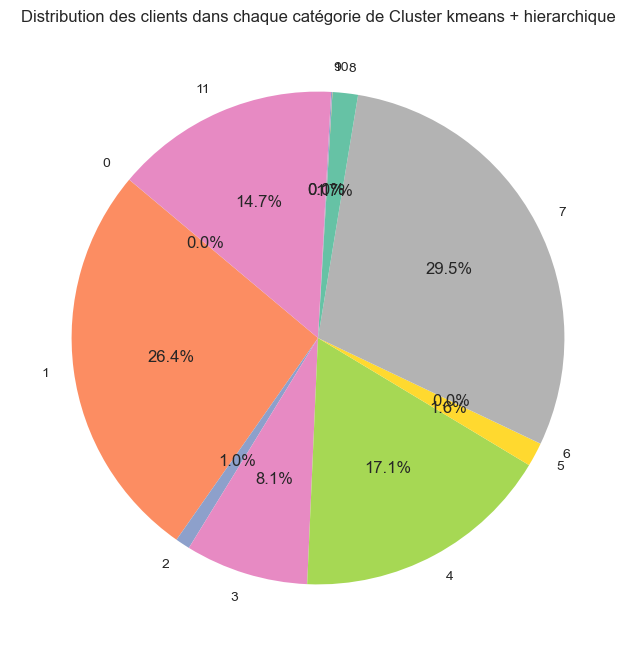

In [86]:
cluster_counts = data['Cluster_hierar'].value_counts().sort_index()

# Créer un graphique en camembert pour afficher le pourcentage de clients par catégorie de cluster
plt.figure(figsize=(8, 8))
plt.pie(cluster_counts, labels=cluster_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set2', len(cluster_counts)))
plt.title('Distribution des clients dans chaque catégorie de Cluster kmeans + hierarchique')
plt.show()

## Les clusters et profils

C'est le clustering K-means avec 8 clusters qui est le plus interessant dans cette configuration.

### Visualisation des clusters avec T-SNE

In [87]:
# Sélectionnez les caractéristiques pour t-SNE
X = data.drop(['Cluster_kmeans', 'Cluster_DB', 'Cluster_hierar'], axis=1)

# Initialiser et ajuster t-SNE
tsne = TSNE(n_components=3, random_state=42)
X_tsne = tsne.fit_transform(X)


KeyboardInterrupt: 

In [ ]:
# Créer un scatter plot pour visualiser les clusters kmeans
plt.figure(figsize=(10, 8))
# colorer les points en fonction de leur cluster
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=data['Cluster_kmeans'], cmap='viridis', alpha=0.7)

plt.title('Visualisation des clusters Kmeans avec t-SNE')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.colorbar(label='Cluster_kmeans')
plt.show()

In [ ]:
# Créer un scatter plot 3D pour visualiser les clusters kmeans
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Colorer les points en fonction de leur cluster
scatter = ax.scatter(X_tsne[:, 0], X_tsne[:, 1], X_tsne[:, 2], c=data['Cluster_kmeans'], cmap='viridis', alpha=0.7)

# Ajouter des étiquettes et un titre
ax.set_title('Visualisation des clusters Kmeans avec t-SNE (3D)')
ax.set_xlabel('t-SNE 1')
ax.set_ylabel('t-SNE 2')
ax.set_zlabel('t-SNE 3')

# Ajouter une barre de couleur pour indiquer les clusters
cbar = fig.colorbar(scatter, ax=ax, shrink=0.5, aspect=5)
cbar.set_label('Cluster_kmeans')

plt.show()

### Profils

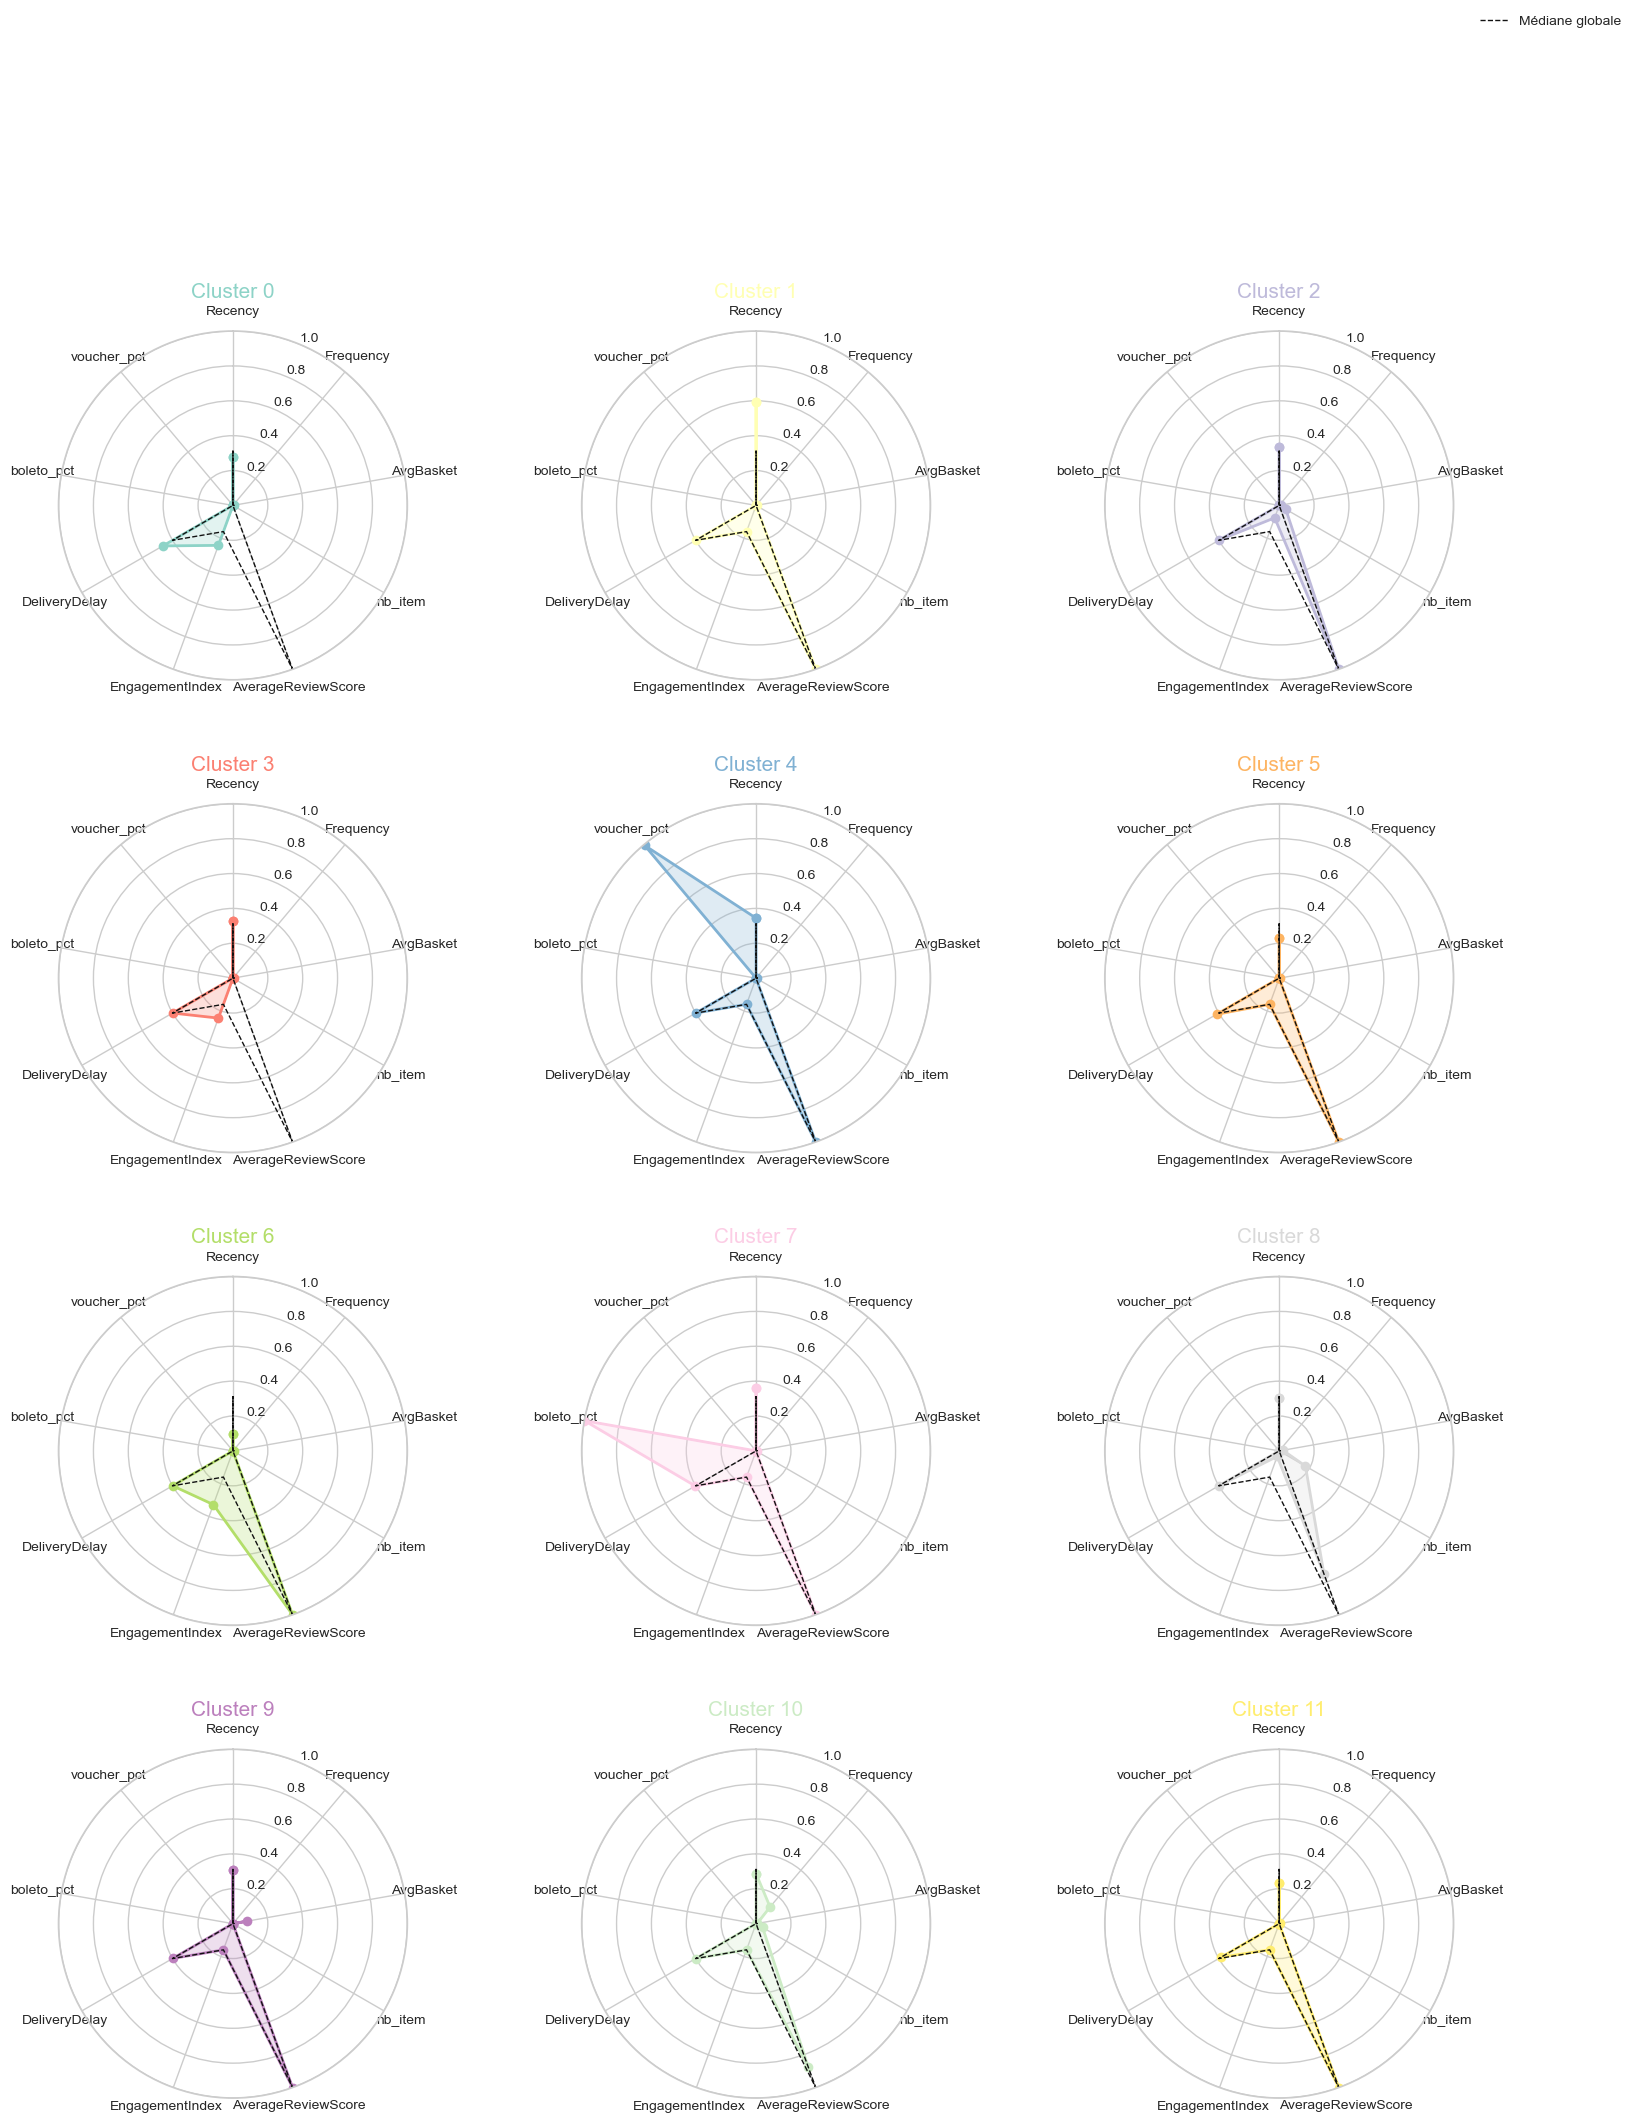

In [88]:
plot_cluster_medians(data, features, 12, 'Cluster_kmeans')